In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

## BER Graph

#### Examine 5 runs for dataset

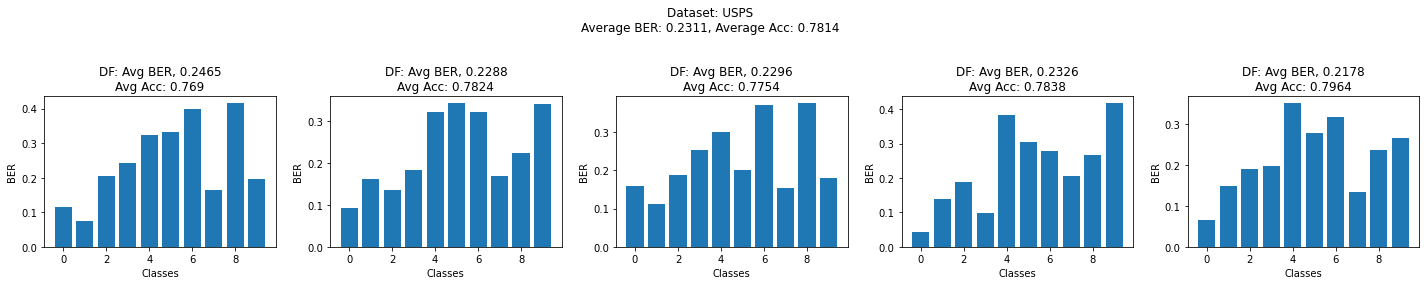

In [87]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(1,5)
i=0; j=0
dataset= "USPS"
# folder_dict={"DF":"DF", "Baseline":"Baseline", "Weight":"Weight","Grad":"Grad",
#              "Phases-Simul":"Phases", "Phases-ThresholdedSimul":"Phases", "NFS":"NFS"} #model: folder
folder_dict={"Baseline":"Baseline", "DF":"DF", "NFS":"NFS","Weight":"Weight", "Grad":"Grad"}
model="DF"
epoch=100

plt.suptitle("Dataset: "+dataset )
# fig.set_figheight(5)
fig.set_figwidth(20)

avg_ber= []
avg_acc= []
for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{folder_dict[model]}/scikit_feat-{model}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{folder_dict[model]}/scikit_feat-{model}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[j].bar([i for i in range(len(ber))], ber)
    axes[j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[j].set_xlabel("Classes")
    axes[j].set_ylabel("BER")
    j += 1
    
    avg_ber.append(np.mean(ber))
    avg_acc.append(np.mean(dictionary['accuracy']))
plt.suptitle(f"Dataset: {dataset}\nAverage BER: {round(np.mean(avg_ber),4)}, Average Acc: {round(np.mean(avg_acc), 4)}\n" )

plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

# Baseline

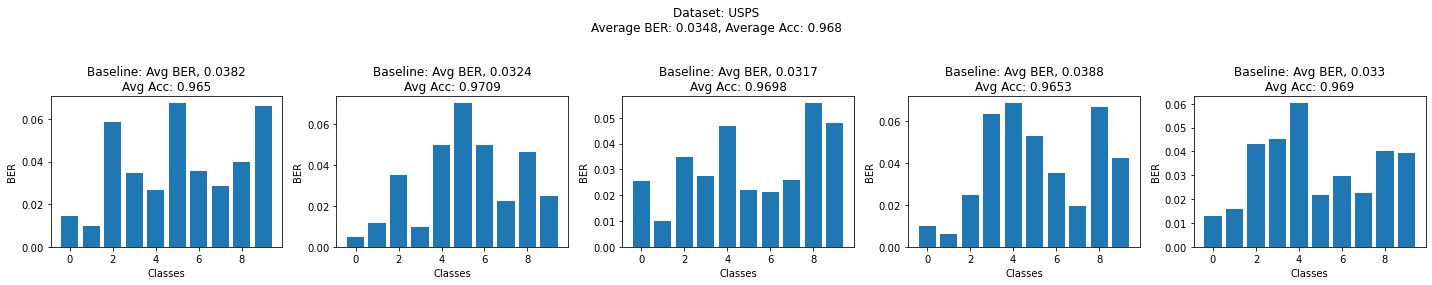
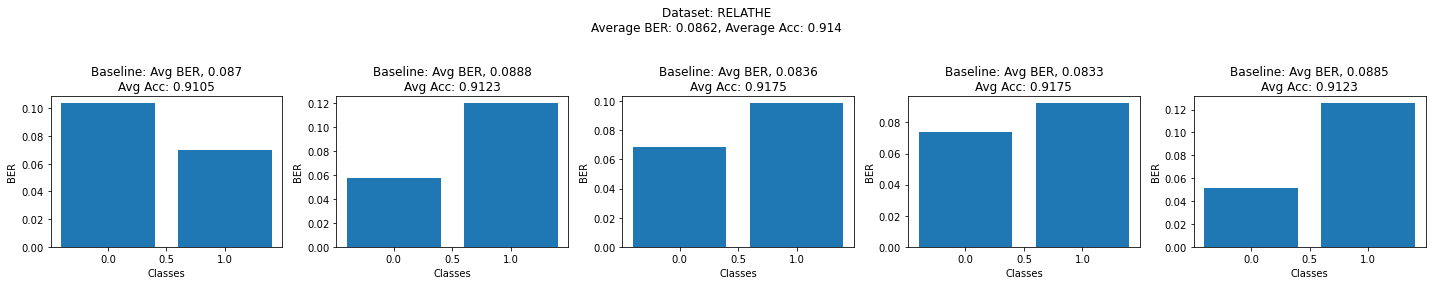
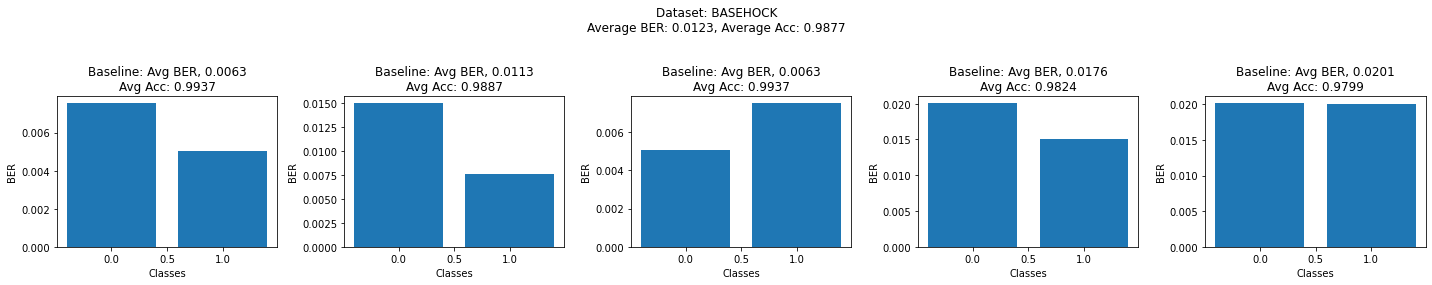
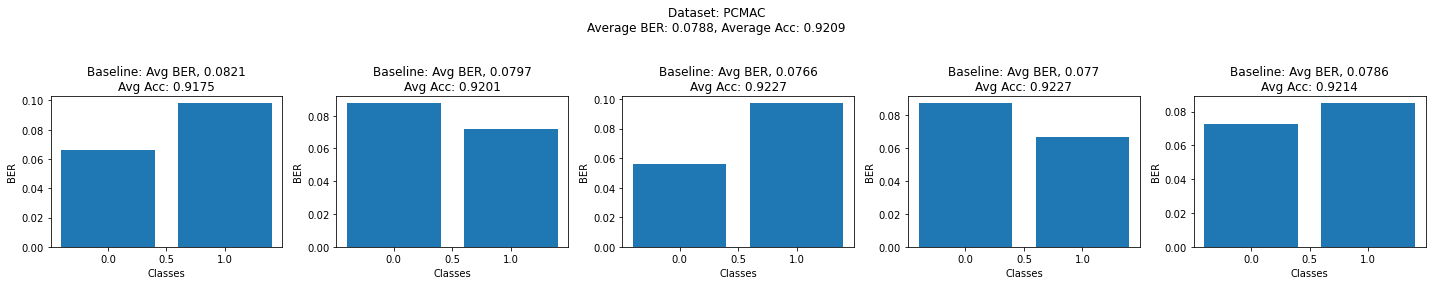

# DF

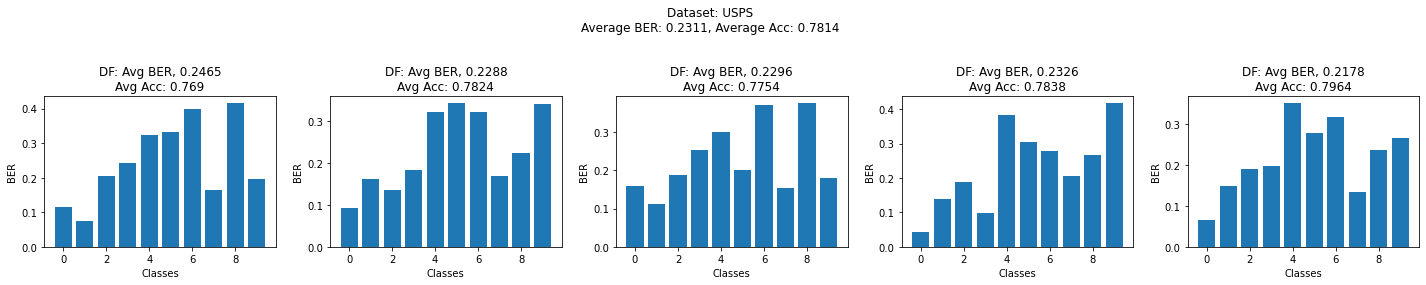
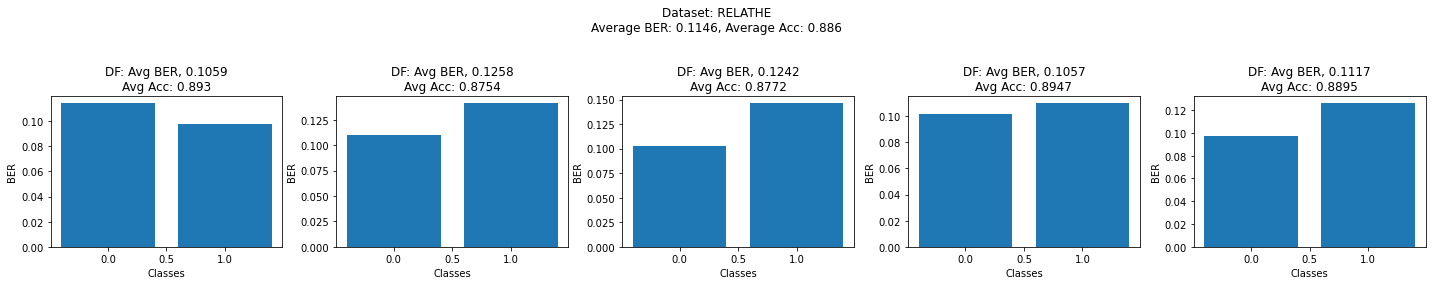
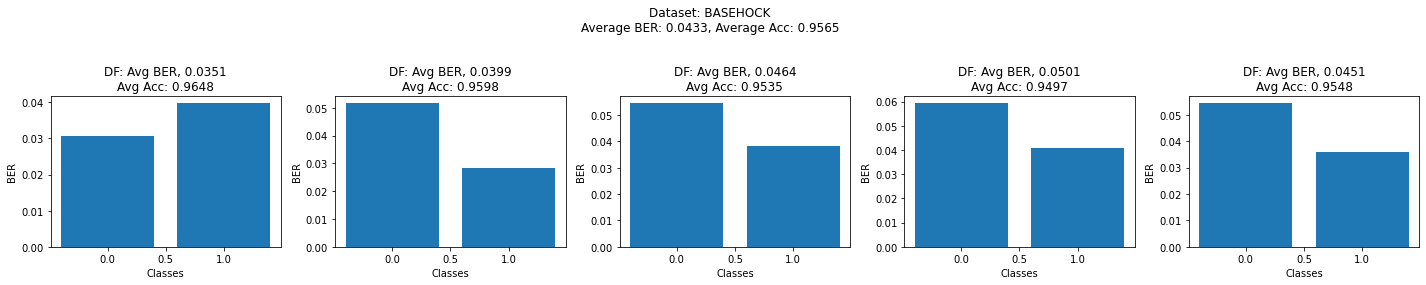
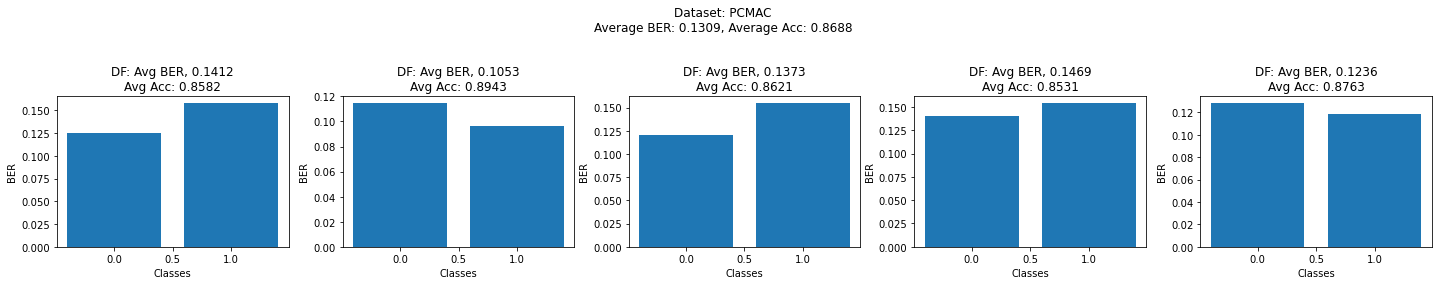

# NFS

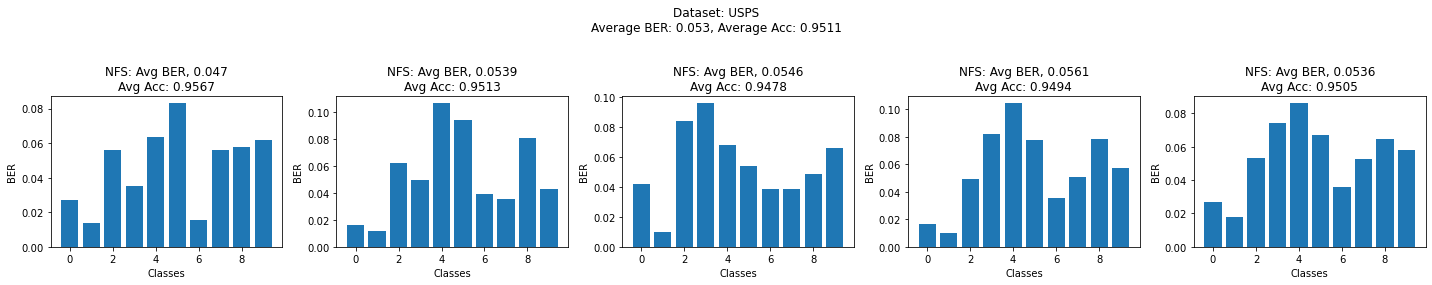
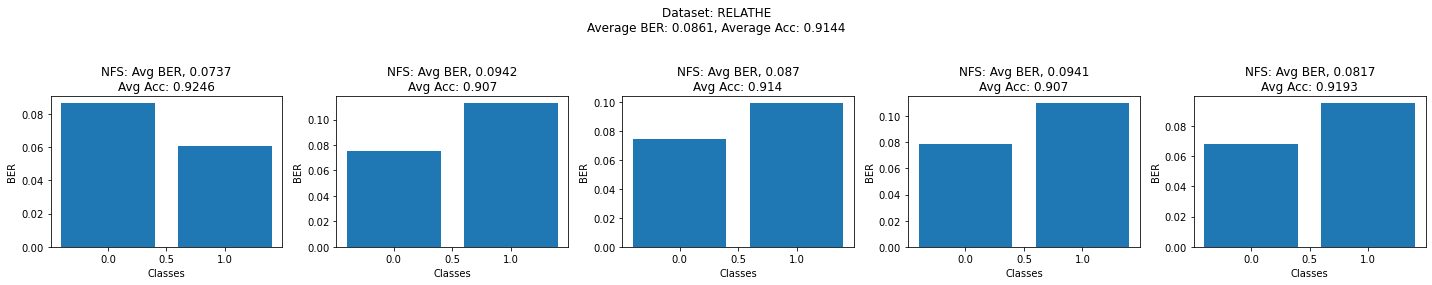
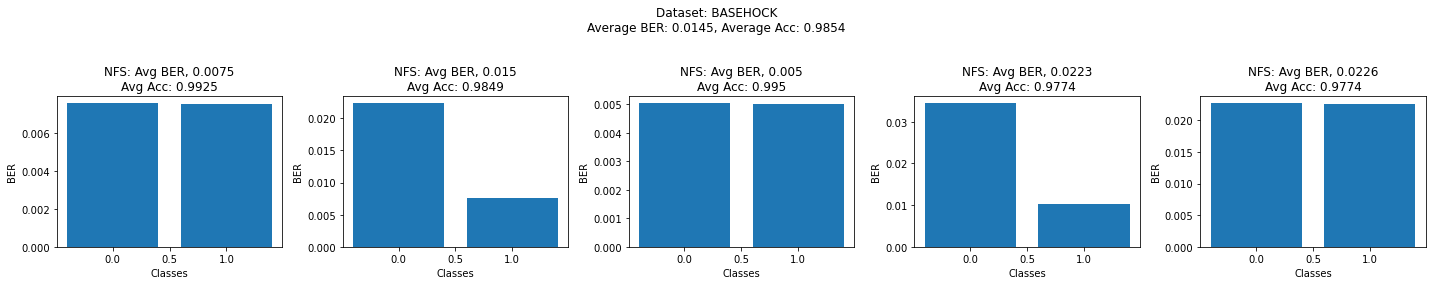
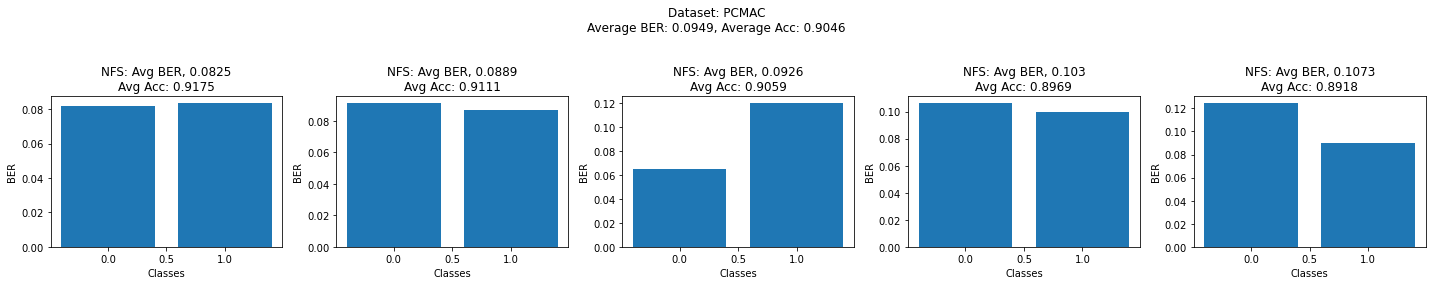

# Weight

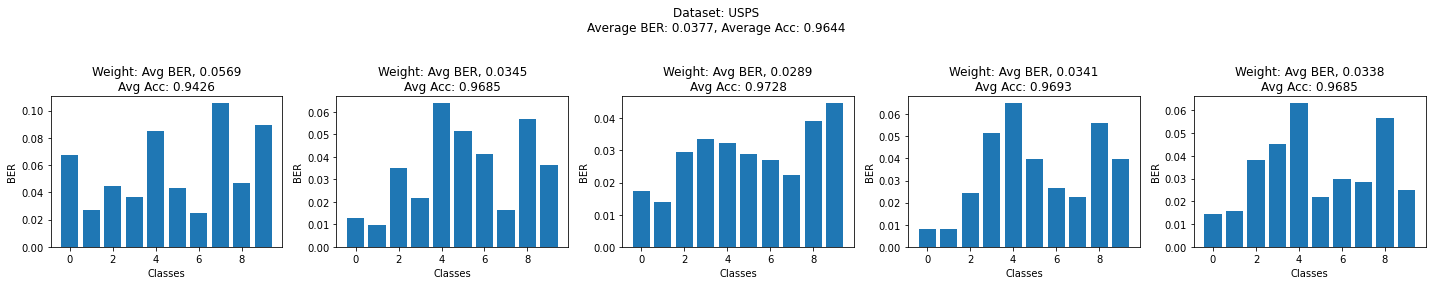
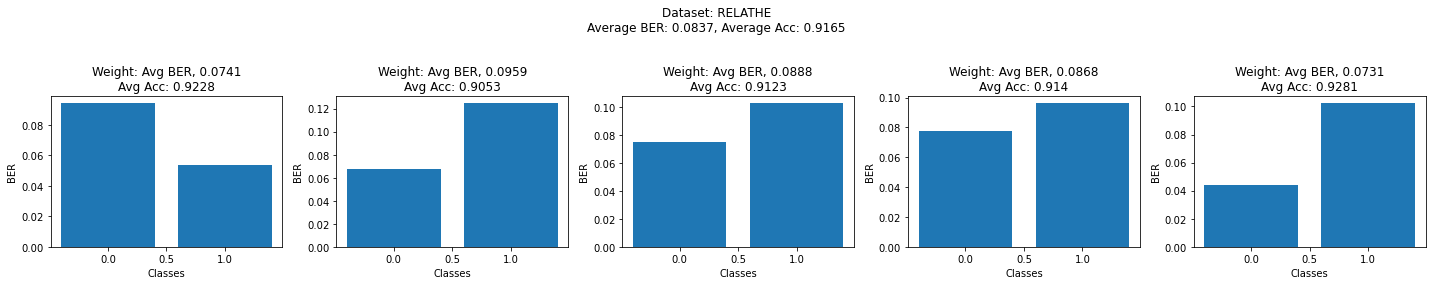
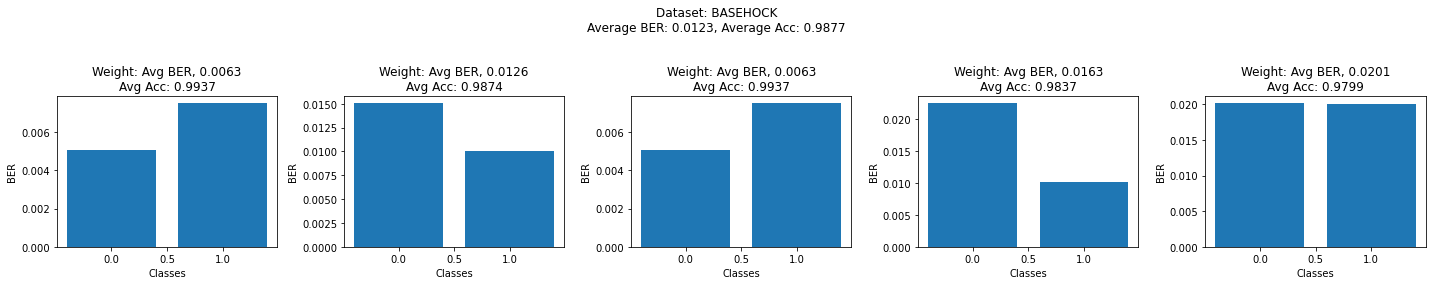
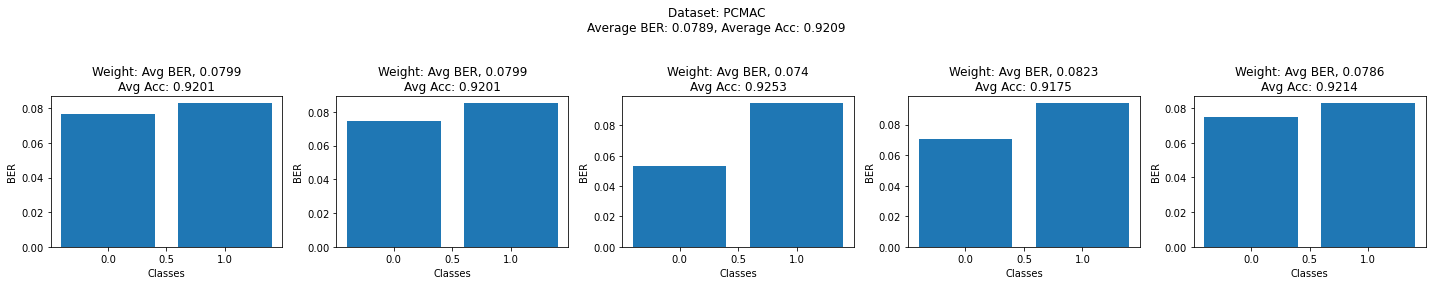

# Grad

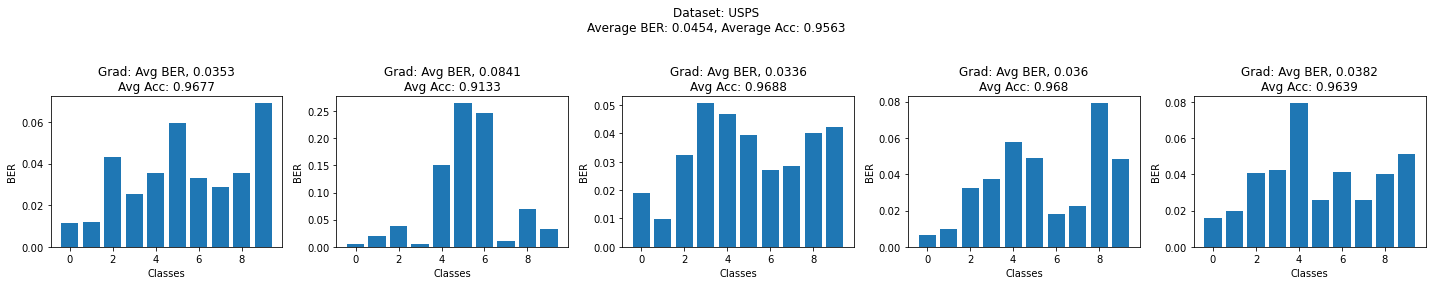
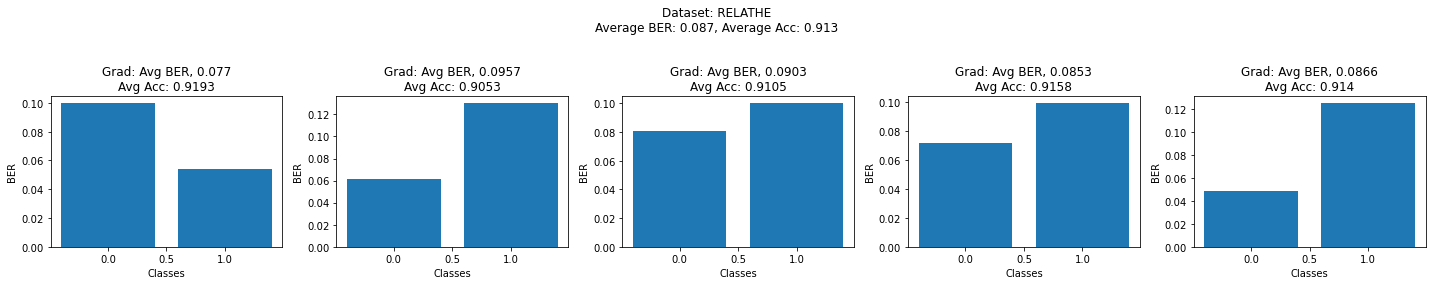
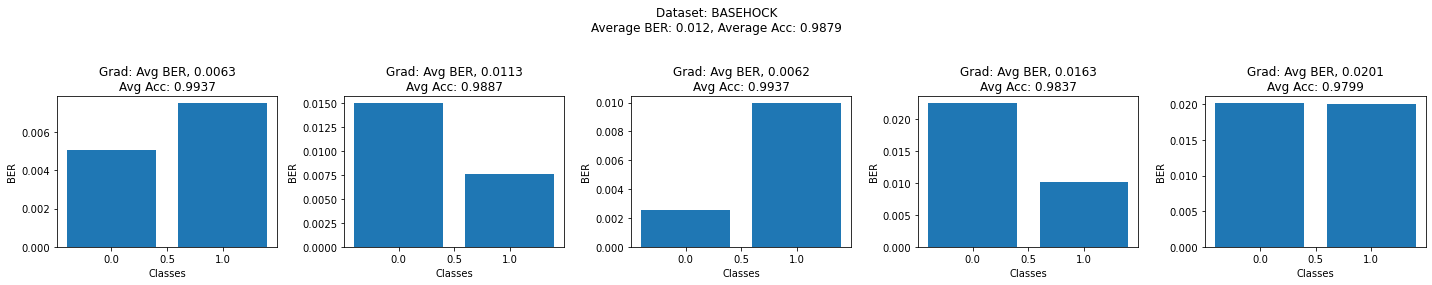
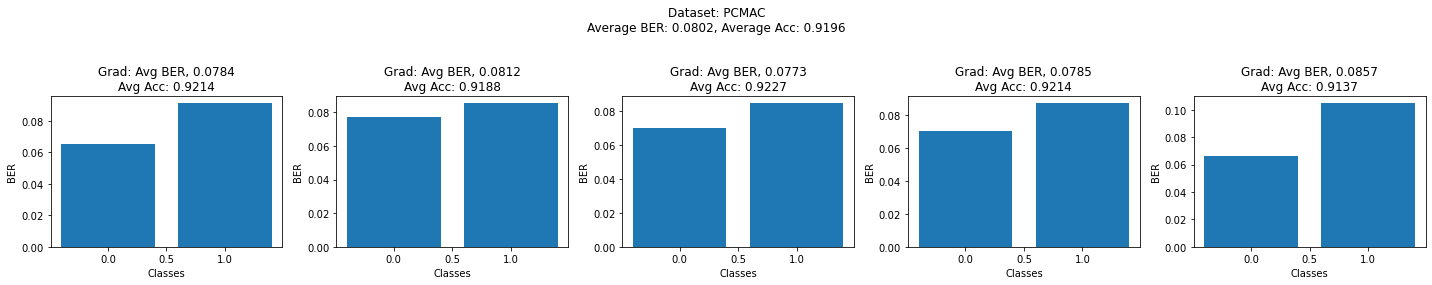

## Subset

## Save RS

In [109]:
import pickle
import os
dataset="PCMAC"
epoch=100
for folder in range(5):
    for percentile in range(10,100,10):
        rs=[]
        dictionaries=[]
        for rs_folder in range(5):
            ber= pickle.load(open(f"./experiments/scikit_feature/exp_log{folder}/RS/RS{rs_folder}/scikit_feat-subset-RS{rs_folder}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb"))
            rs.append(ber)
        
            dictionary= pickle.load(open(f"./experiments/scikit_feature/exp_log{folder}/RS/RS{rs_folder}/scikit_feat-subset-RS{rs_folder}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb")).copy()
            dictionaries.append({"accuracy":dictionary["accuracy"], "macro avg":{"precision": dictionary["macro avg"]["precision"], "recall": dictionary["macro avg"]["recall"], "f1-score": dictionary["macro avg"]["f1-score"]}})

        if not os.path.exists(f"./experiments/scikit_feature/exp_log{folder}/RS/subset"):
            os.mkdir(f"./experiments/scikit_feature/exp_log{folder}/RS/subset")
#         pickle.dump(np.array(rs).mean(0), open(f"./experiments/scikit_feature/exp_log{folder}/RS/subset/scikit_feat-subset-RS-{dataset}-{percentile}-ber-{epoch}.pkl", "wb"))
        dictionary= {"accuracy":np.mean([i['accuracy'] for i in dictionaries]), "macro avg":{"precision": np.mean([i['macro avg']['precision'] for i in dictionaries]), "recall":np.mean([i['macro avg']['recall'] for i in dictionaries]), "f1-score":np.mean([i['macro avg']['f1-score'] for i in dictionaries])} }

#         pickle.dump(dictionary, open(f"./experiments/scikit_feature/exp_log{folder}/RS/subset/scikit_feat-subset-RS-{dataset}-{percentile}-v_dict-{epoch}.pkl", "wb"))        

## RS

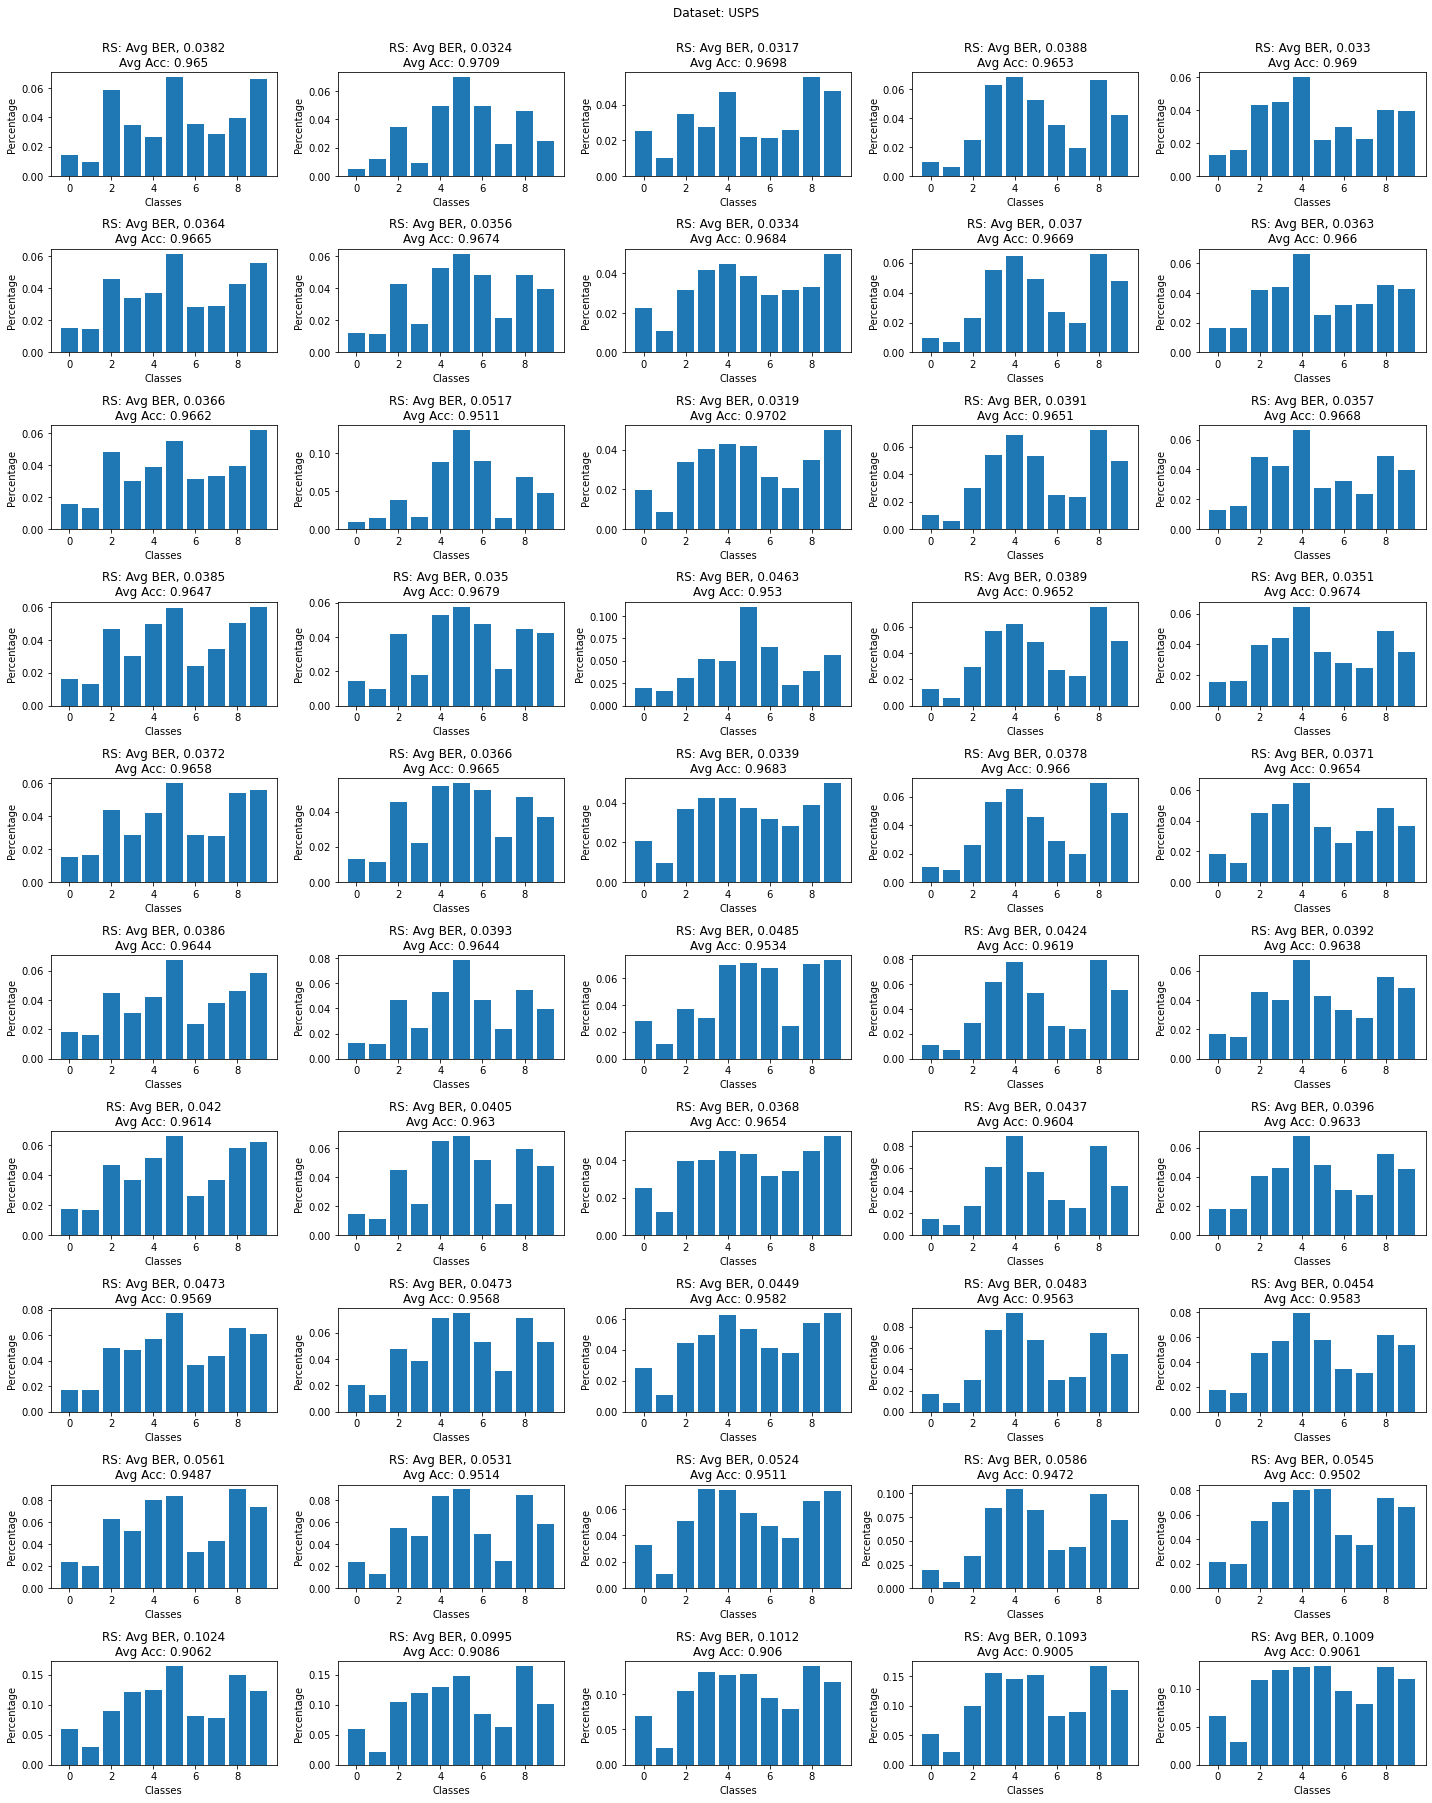

In [96]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "USPS"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight", "Grad-AUC":"Grad"} #folder: model
model="RS"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## DF

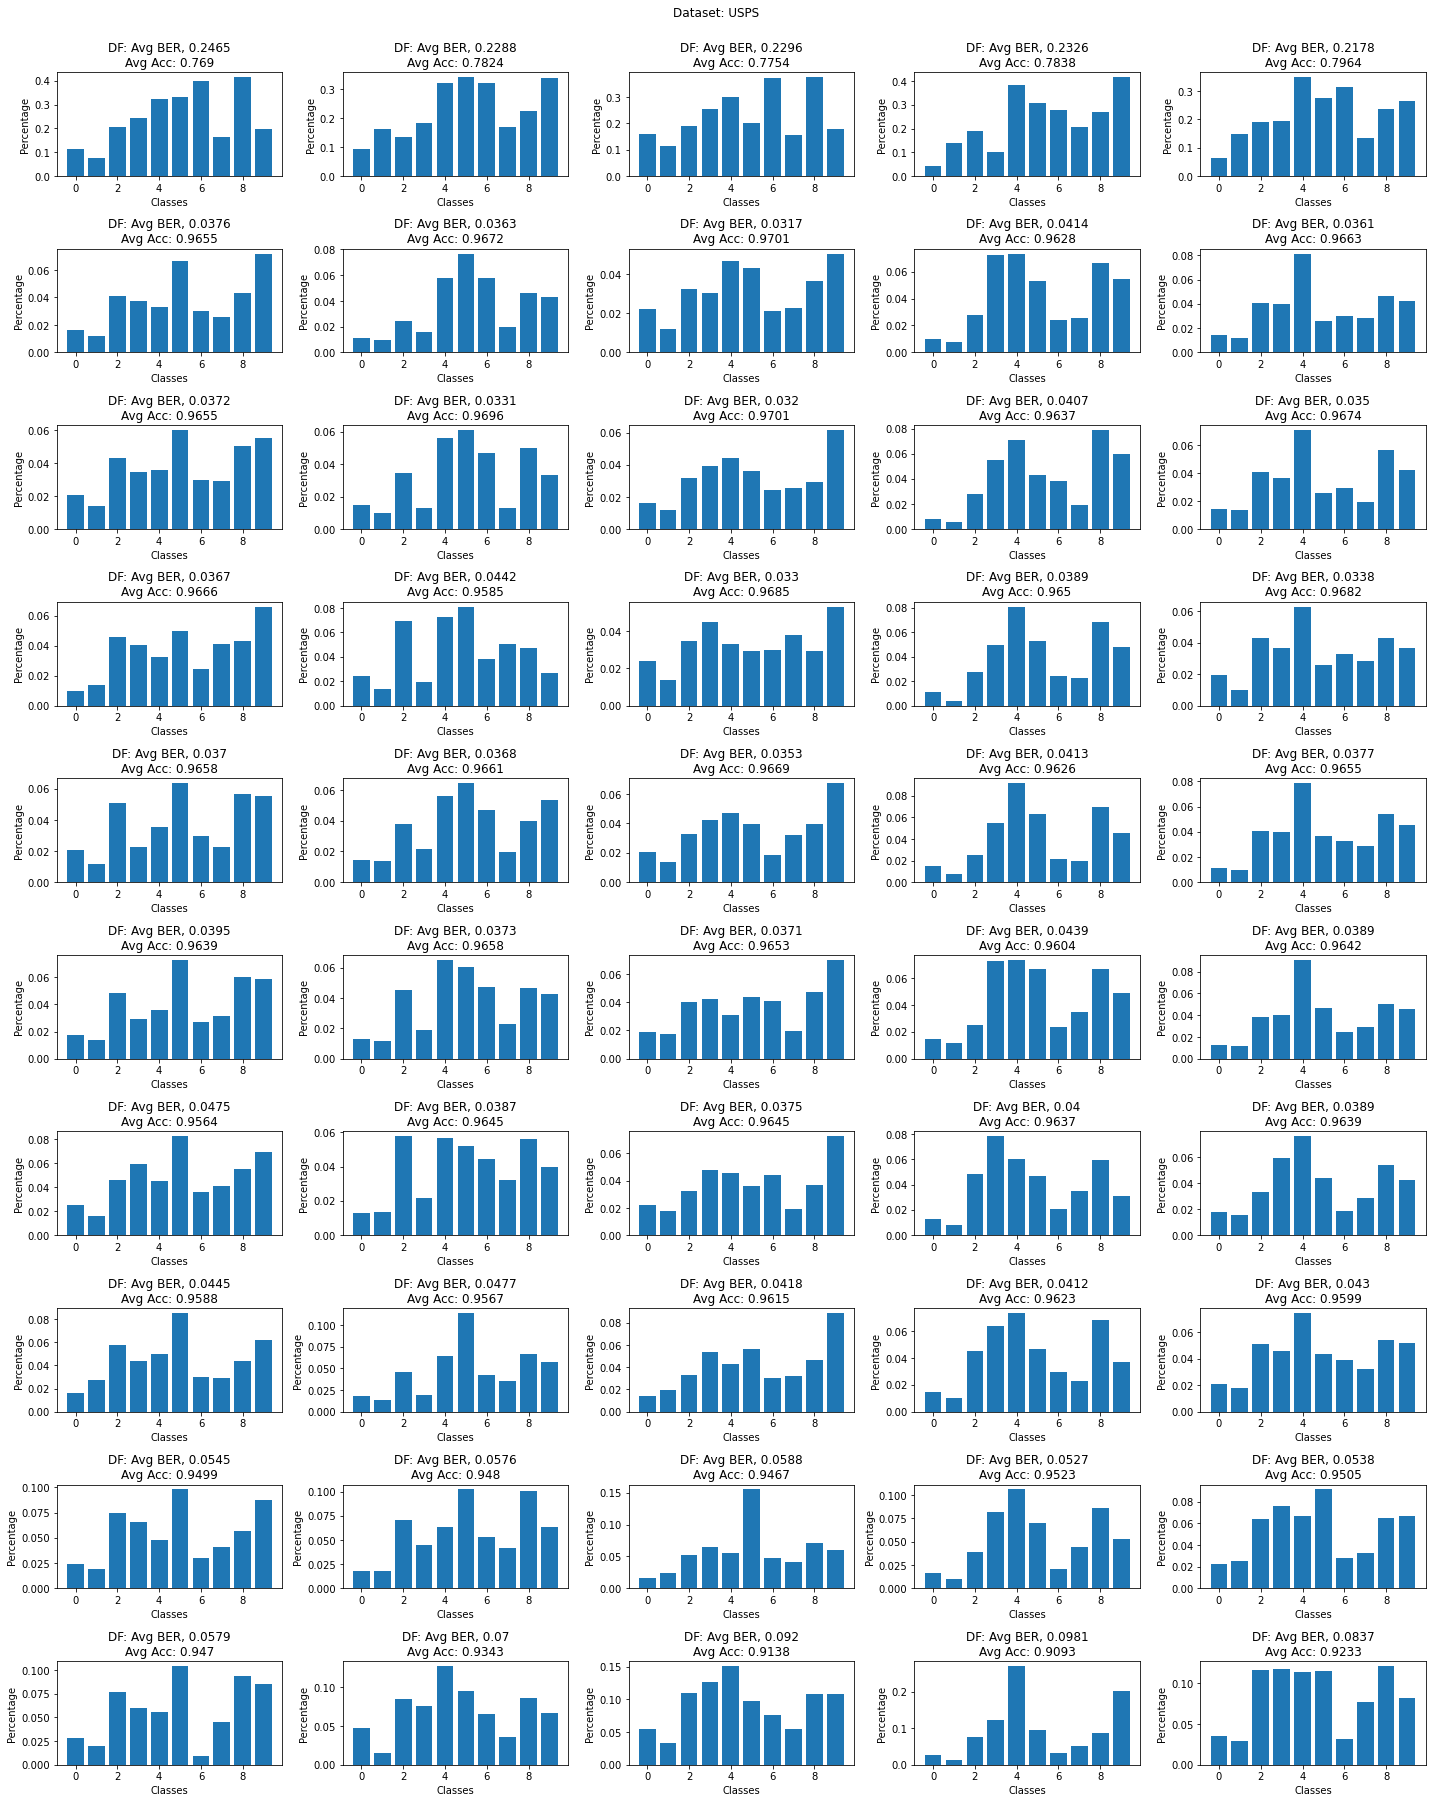

In [116]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "USPS"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight", "Grad-AUC":"Grad"} #folder: model
model="DF"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## NFS

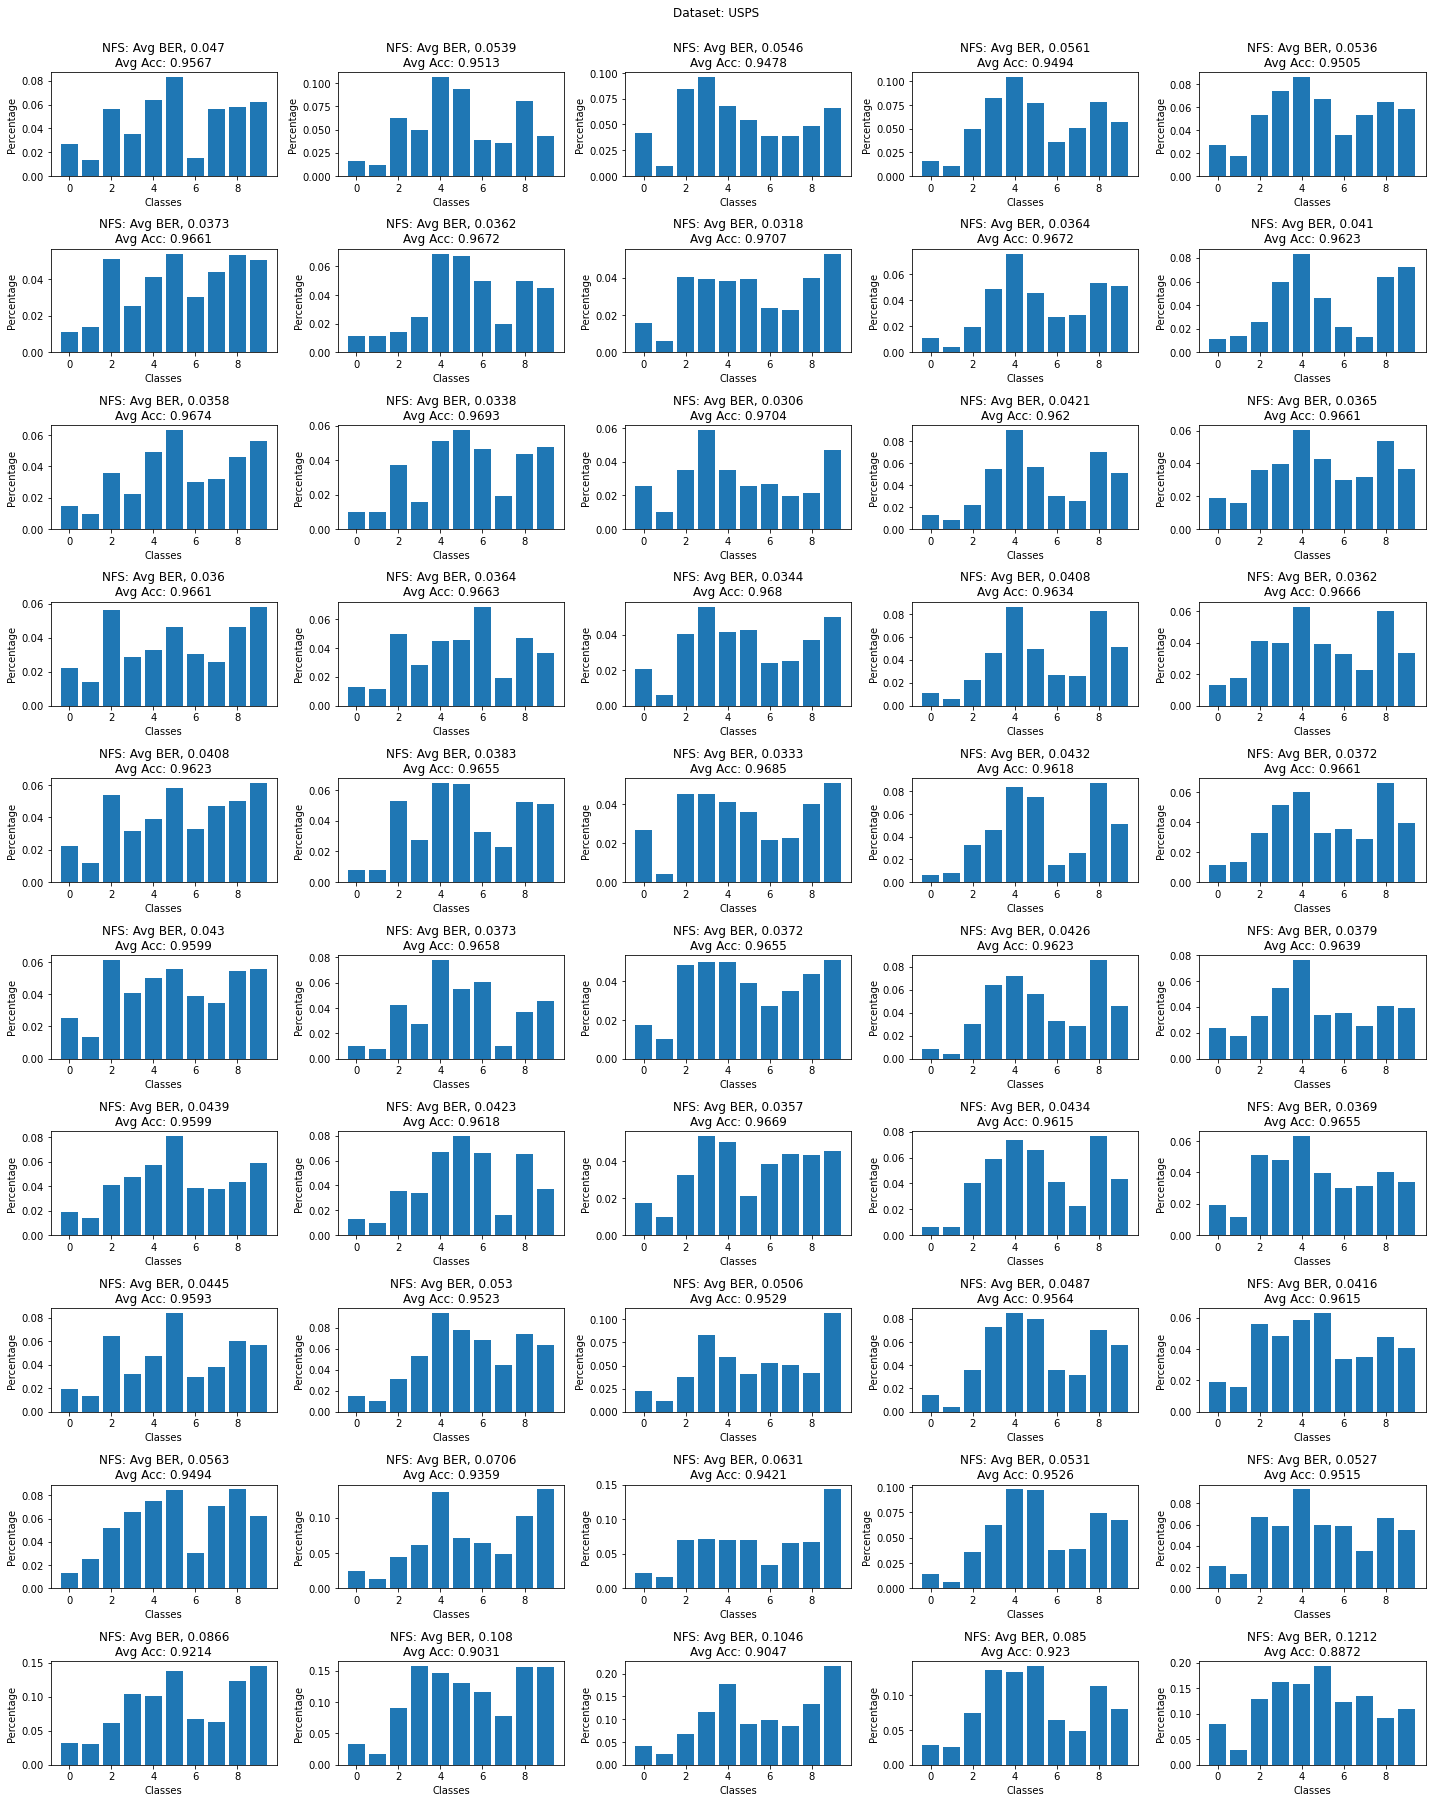

In [120]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "USPS"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "NFS":"NFS", "Grad-AUC":"Grad"} #folder: model
model="NFS"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

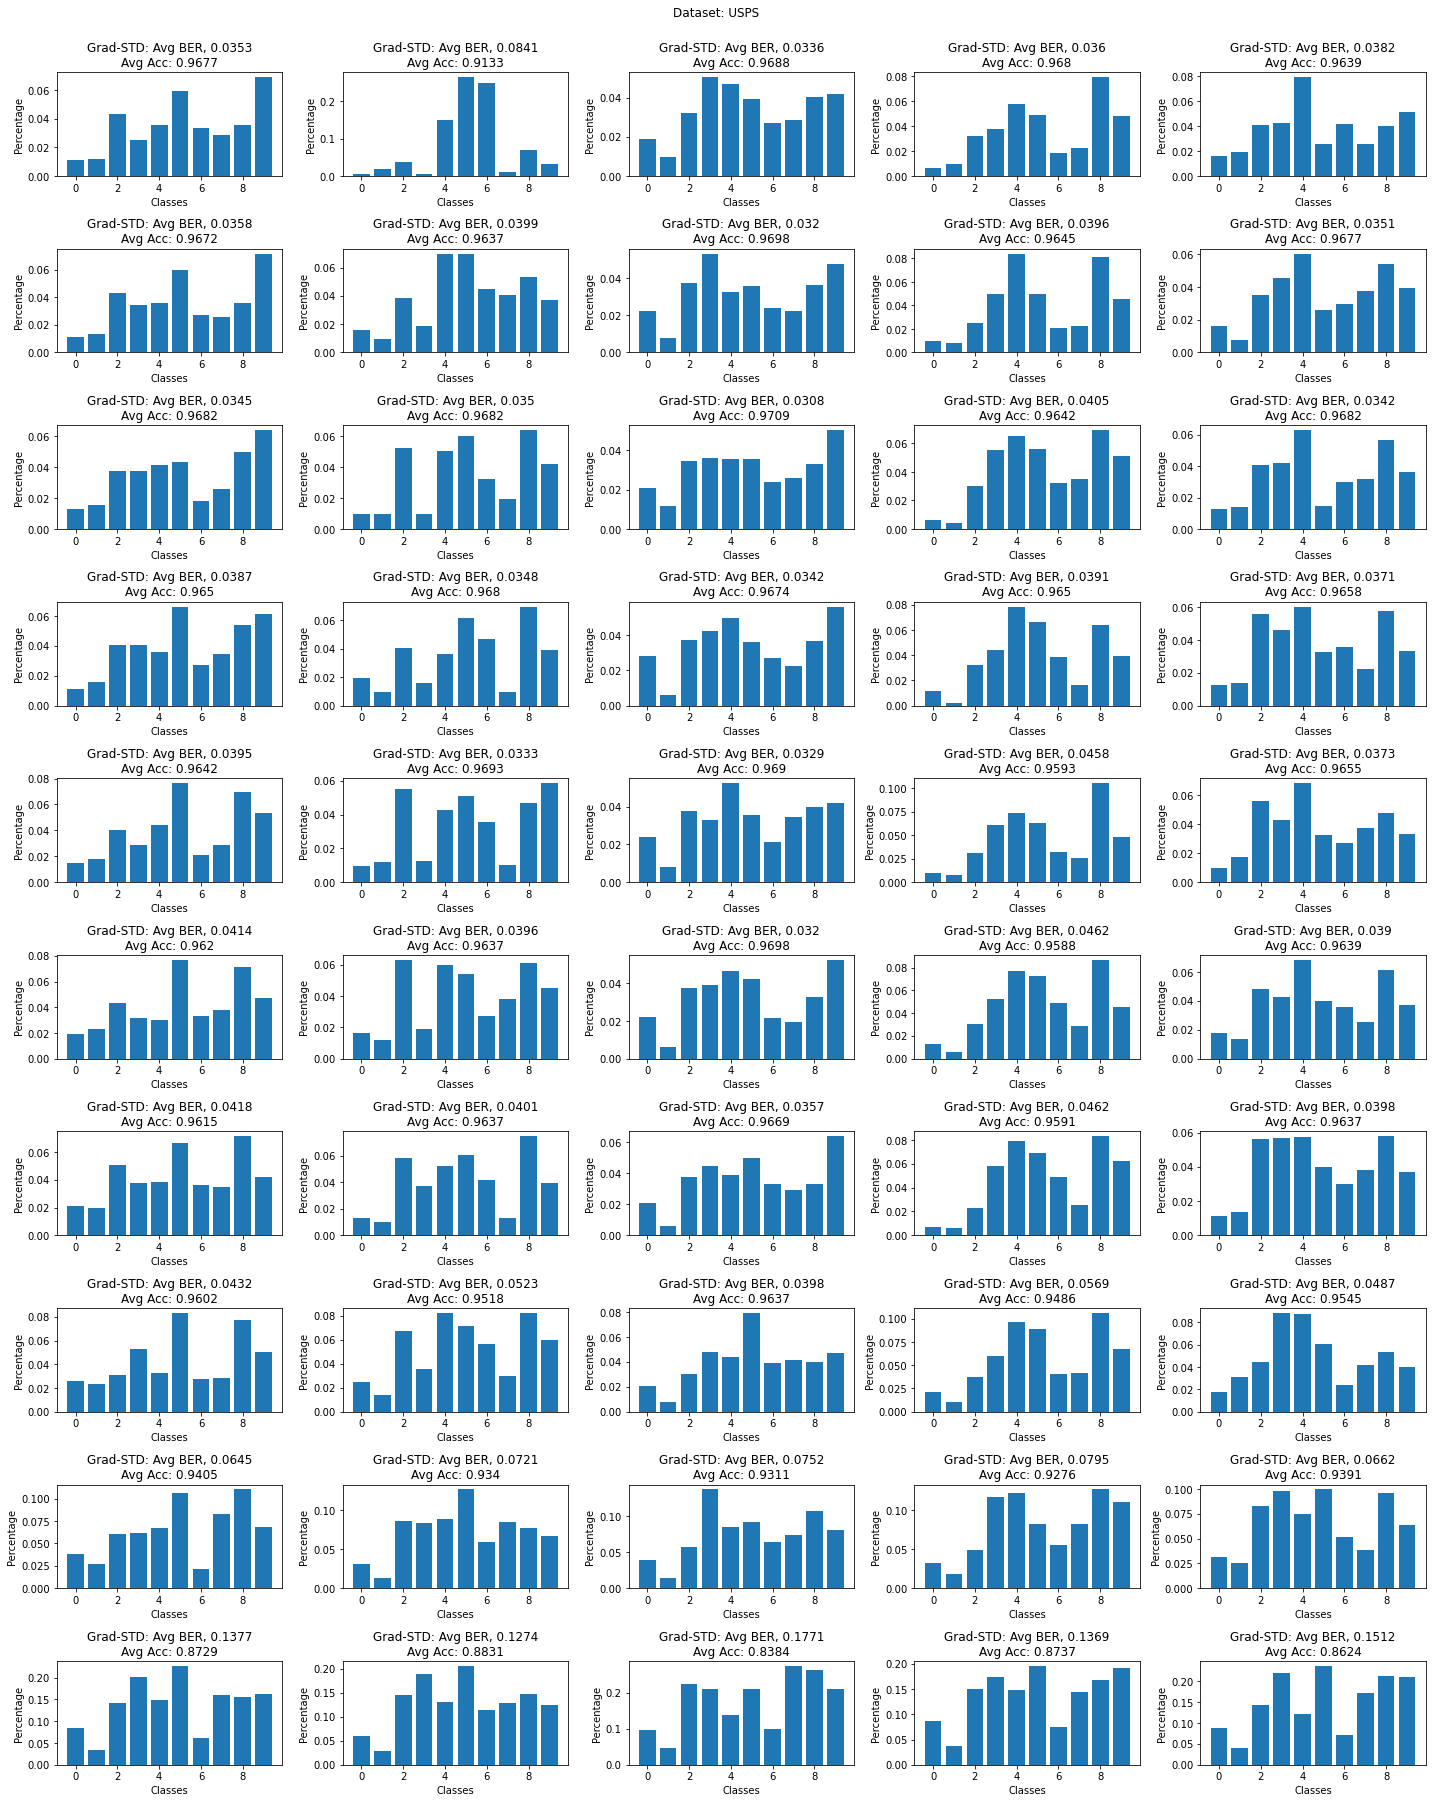

In [127]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "USPS"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "Grad-AUC":"Grad", "Grad-STD":"Grad"} #folder: model
model="Grad-STD"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

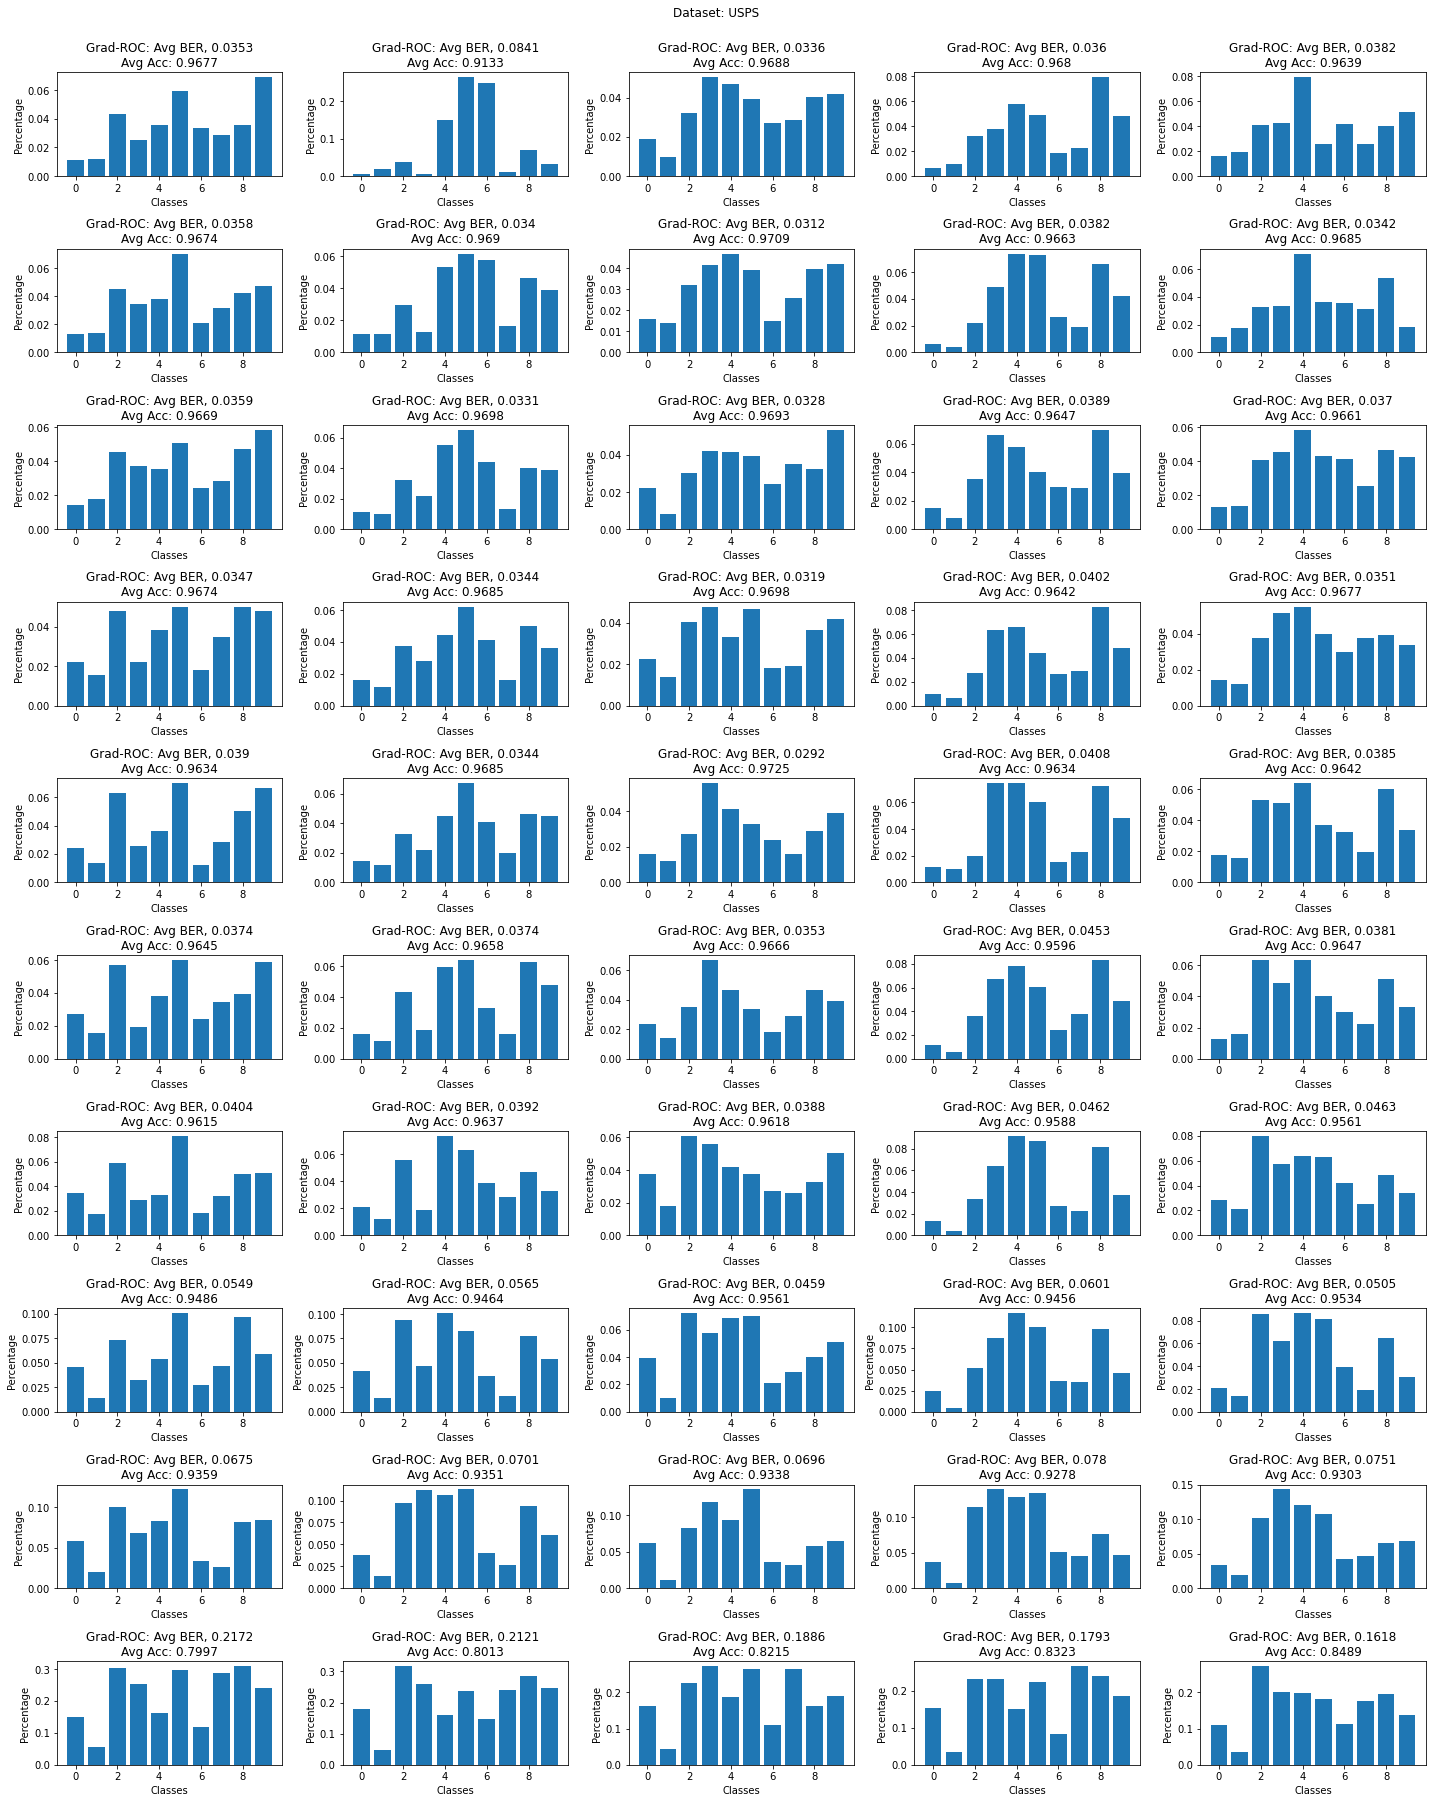

In [129]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "USPS"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "Grad-AUC":"Grad", "Grad-STD":"Grad", "Grad-ROC":"Grad"} #folder: model
model="Grad-ROC"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

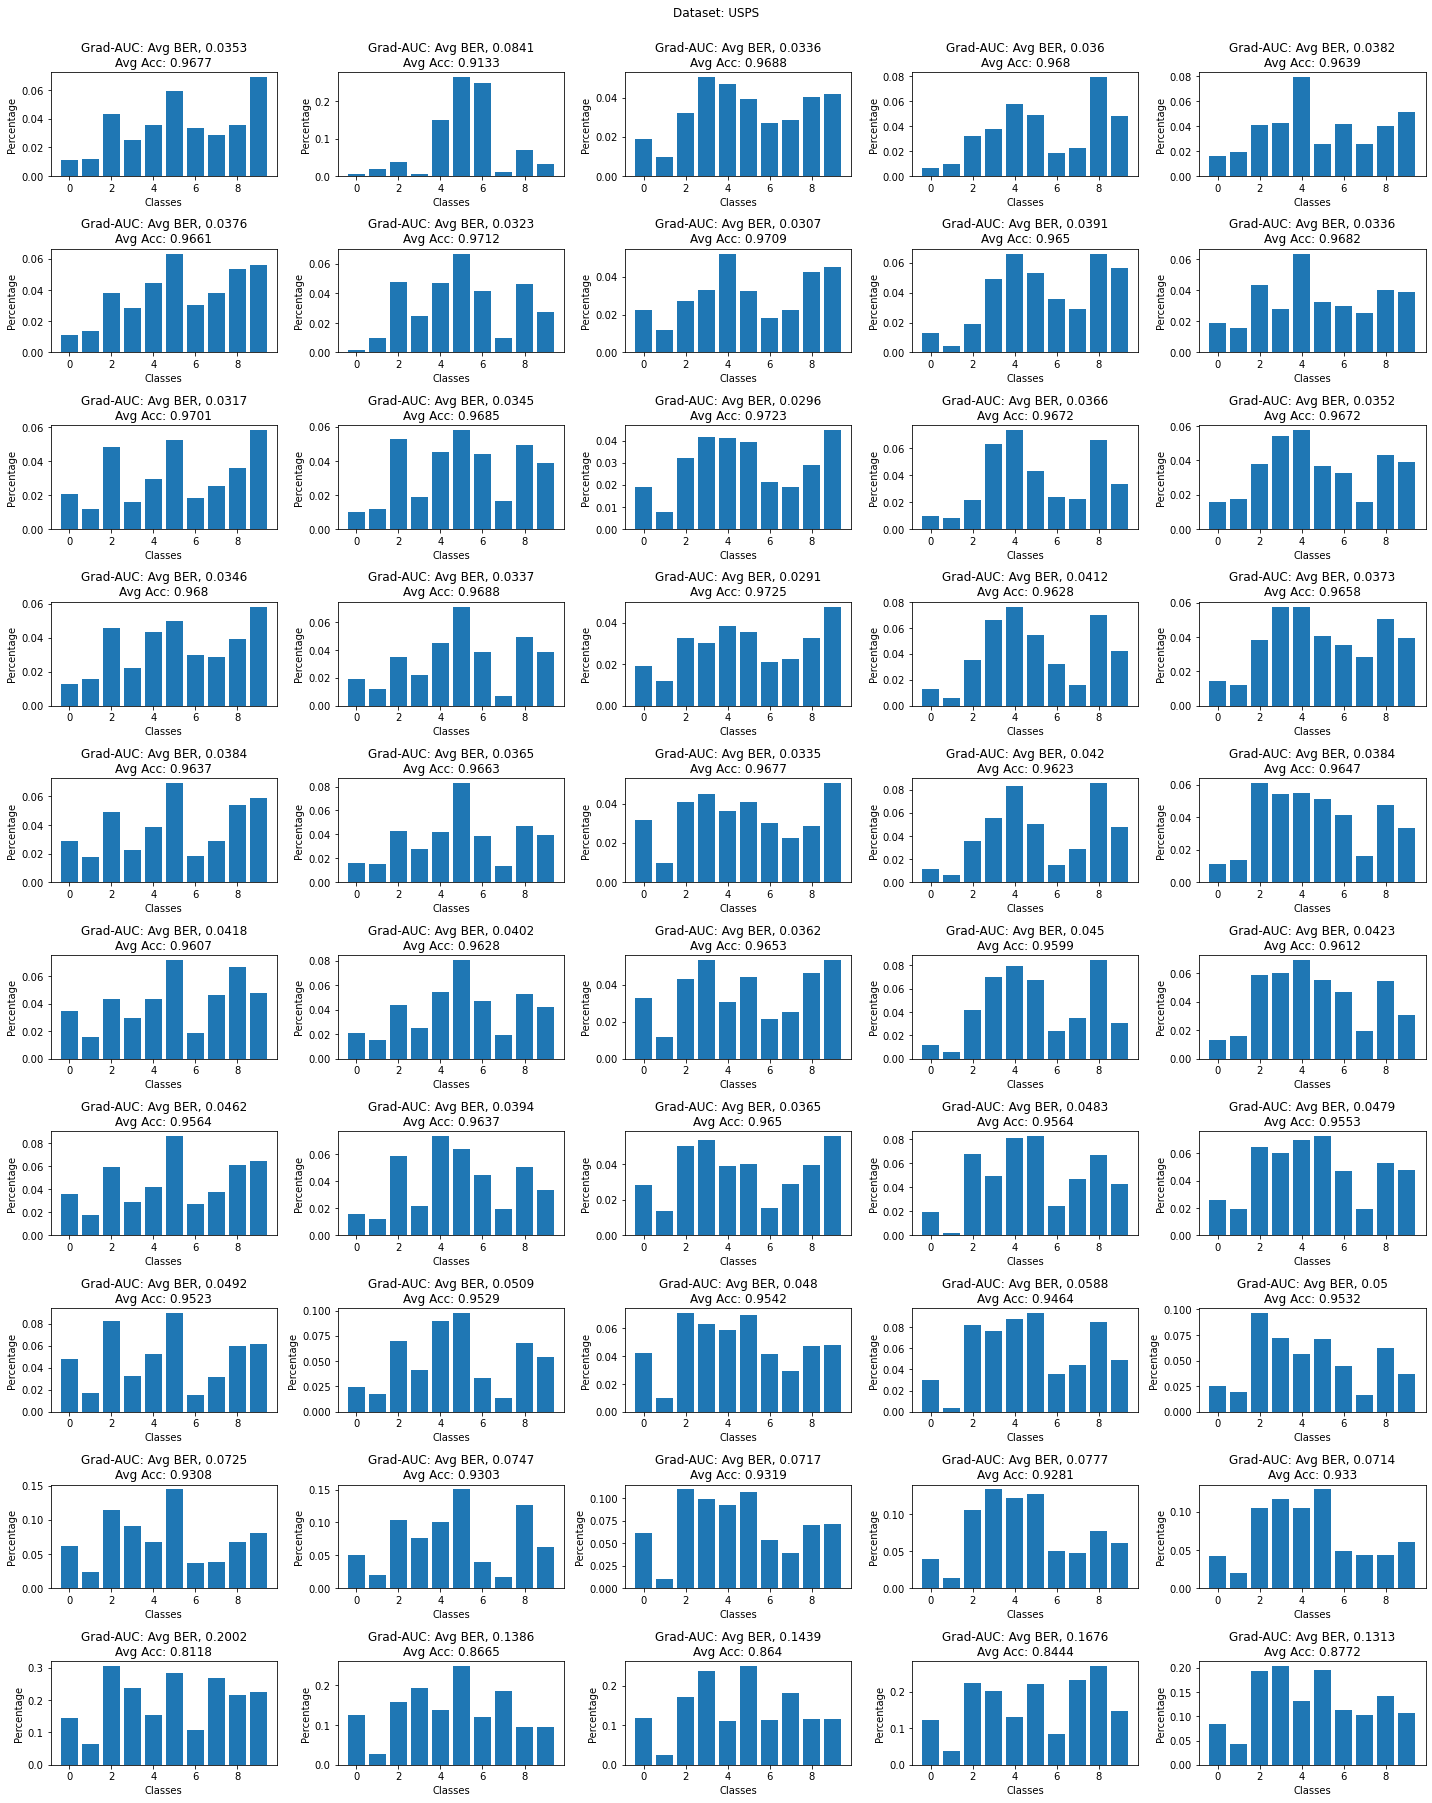

In [121]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "USPS"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "Grad-AUC":"Grad", "Grad-STD":"Grad", "Grad-ROC":"Grad"} #folder: model
model="Grad-AUC"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

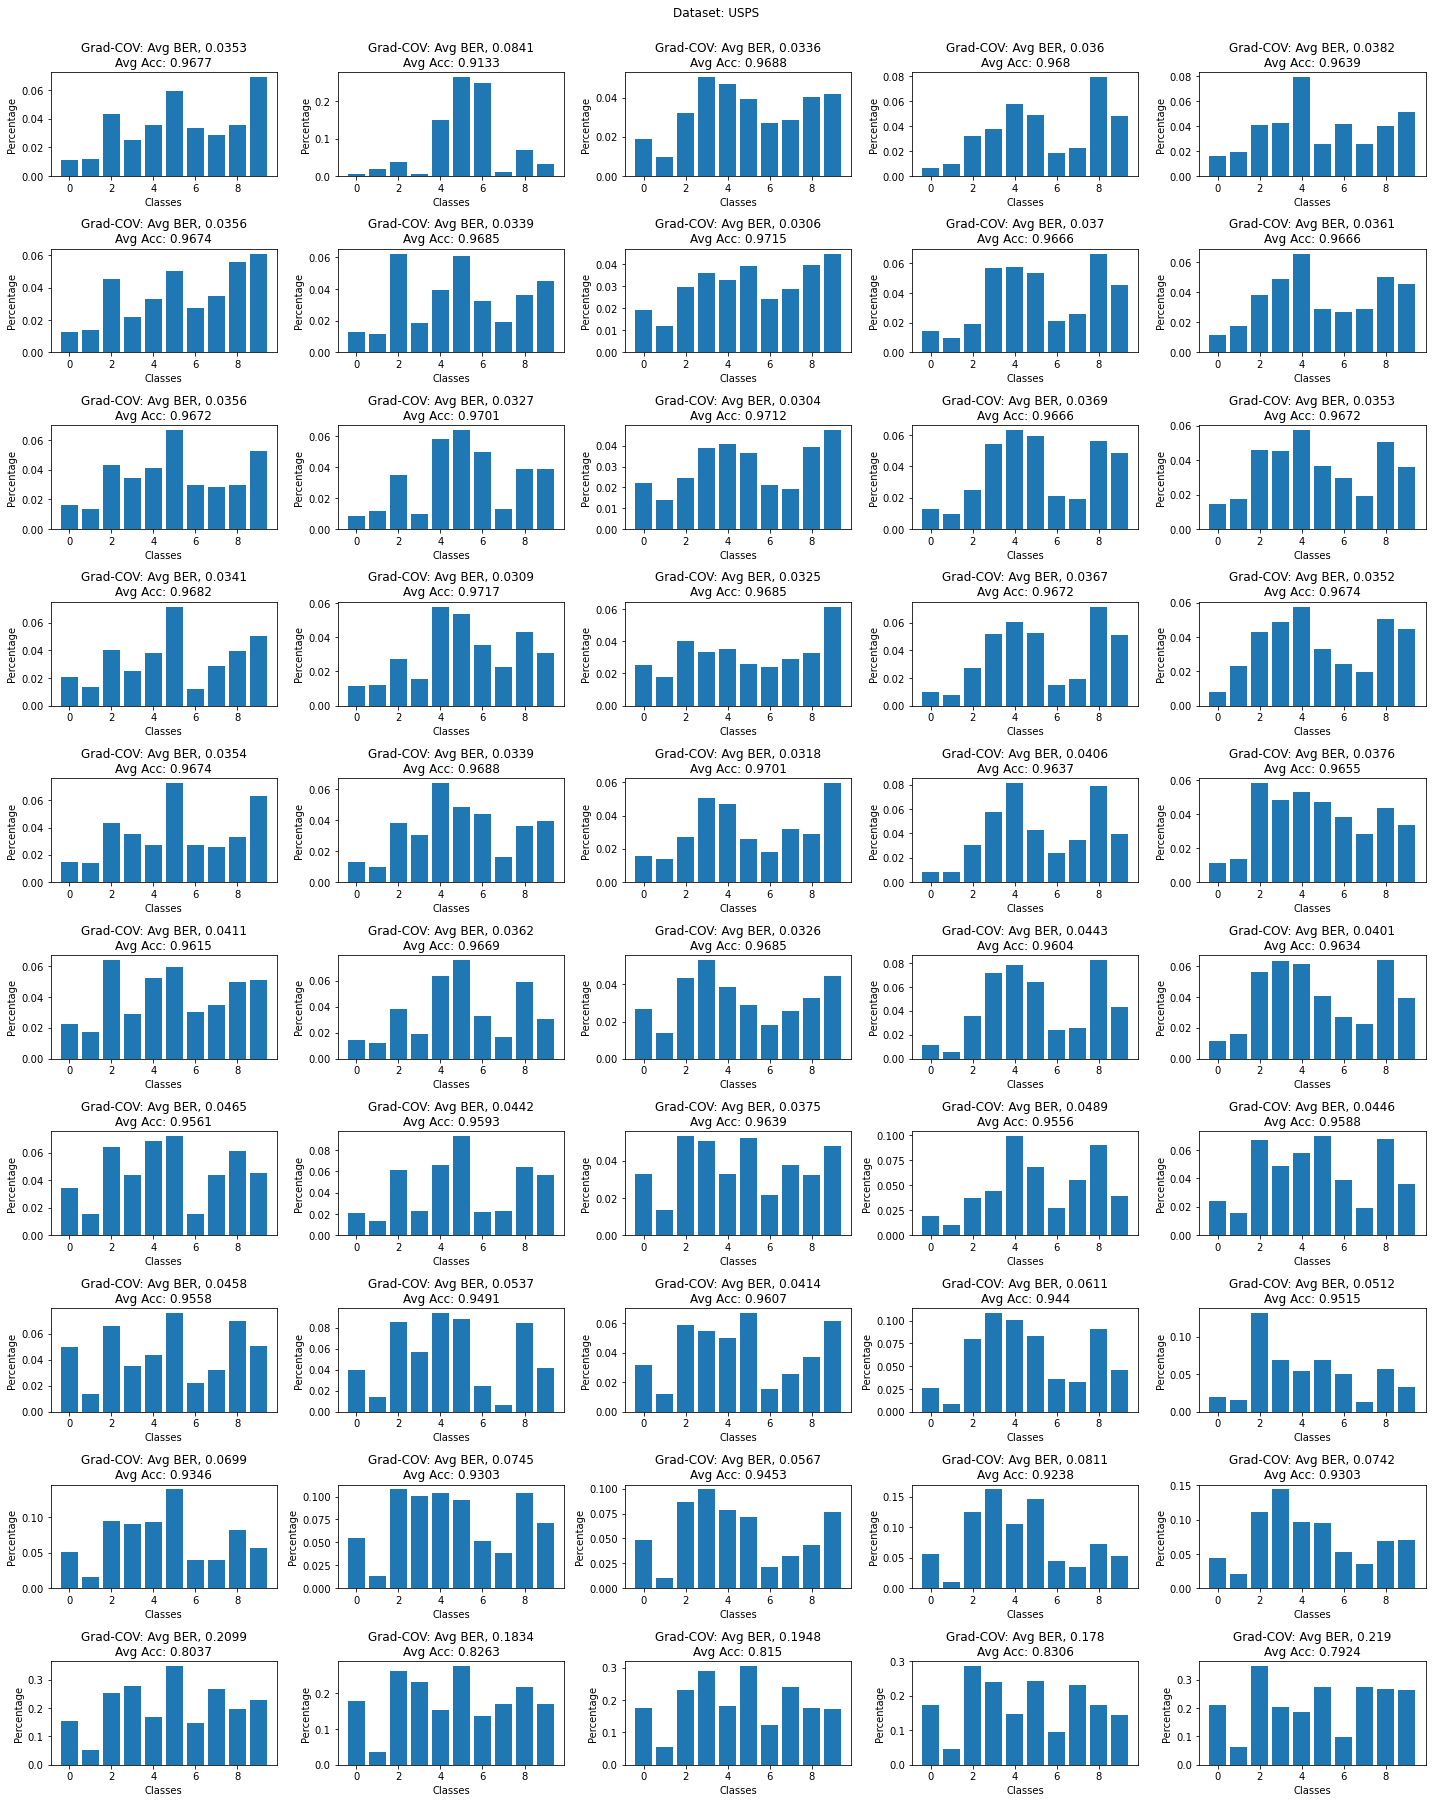

In [123]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "USPS"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline", "Grad-COV":"Grad",
               "Weight":"Weight", "Grad-AUC":"Grad", "Grad-STD":"Grad", "Grad-ROC":"Grad"} #folder: model
model="Grad-COV"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Individual Folder

Text(0.5, 1.0, 'Subset: USPS')

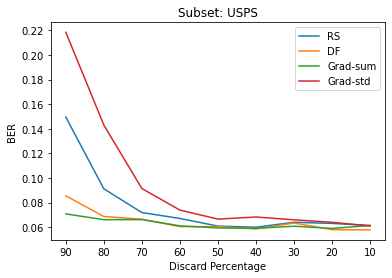

In [132]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


# fig, axes= plt.subplots(5,7)
i=0; j=0
dataset= "USPS"
folder="4"

# models={"Fisher":[], "FScore":[], "RS":[], "DF":[], "Simul":[], "ThresholdedSimul":[]}
models={ "RS":[], "DF":[]}
for_range= range(90,0,-10)
for model in models.keys():
    for percentage in for_range:
        
        if percentage==0:
            continue
        
        ber= pickle.load(open("./experiments/Benchmark/exp_log"+folder+"/"+model+"/subset/benchmark-subset-"+model+"-"+dataset+"-"+str(percentage)+"-ber.pkl", "rb"))

        models[model].append(round(np.mean(ber),4))
        
models["Grad-sum"]=[]
models["Grad-std"]=[]

for model_dir, model in [("Grad", "Grad-std"), ("Grad", "Grad-sum")]:
    for percentage in for_range:
        
        if percentage==0:
            continue
        
        ber= pickle.load(open("./experiments/Benchmark/exp_log"+folder+"/"+model_dir+"/subset/benchmark-subset-"+model+"-"+dataset+"-"+str(percentage)+"-ber.pkl", "rb"))

        models[model].append(round(np.mean(ber),4))
        

        #["subset-DF","subset-simul"]
for result in models.values():
    plt.plot(result)
plt.legend(models.keys())
plt.xticks(range(len(for_range)),labels=[str(i) for i in for_range])
plt.ylabel("BER")
plt.xlabel("Discard Percentage")
plt.title("Subset: "+dataset)
# plt.ylim(top=1.0)

#         axes[i][j].set_title("BER, "+str(round(np.mean(ber),4)))
#         axes[i][j].set_xlabel("Classes")
#         axes[i][j].set_ylabel("Percentage")
#         axes[i][j].set_ylim([0, 0.7])
# #     print(plt.yticks())
# #     axes[i][j].set_yticks(["0."+str(z) for z in range(10)])
    
    
#         if j<6:
#             j+=1
#         elif j==6:
#             i+=1; j=0

# plt.suptitle("Dataset: "+dataset )
# # plt.tight_layout()
# fig.set_figheight(10)
# fig.set_figwidth(20)
# plt.tight_layout()

## Subset

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

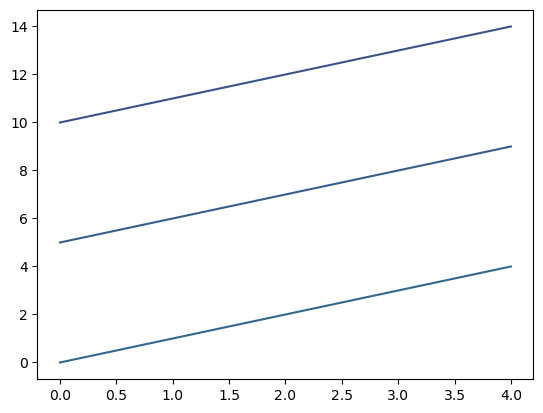

In [4]:
rocket_palette= sns.color_palette("rocket",as_cmap=True)
mako_palette= sns.color_palette("mako",as_cmap=True)
viridis_palette= sns.color_palette("viridis_r",as_cmap=True)
# palette.colors[0]
plt.plot(np.arange(5),color=viridis_palette.colors[170])
plt.plot(np.arange(5,10),color=viridis_palette.colors[180]) 
plt.plot(np.arange(10,15),color=viridis_palette.colors[190])

In [19]:
len(palette.colors)

256

In [3]:
complete_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [11]:
name_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight-Naive"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [22]:
existing_methods= [("Fisher","Fisher"), ("FScore", "FScore"),("RS", "RS"),("DF","DF")]

In [474]:
simul_comparison= [("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight"), ("RS", "RS"),("DF","DF")]

In [169]:
grad_comparison= [("Grad","Grad-sum"), ("Grad", "Grad-std"), ("RS", "RS"),("DF","DF")]

In [80]:
developing_methods= [("Grad","Grad-sum"), ("Grad", "Grad-std"), ("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight")]

In [5]:
import seaborn as sns
# palette= sns.color_palette(as_cmap=True)
rocket_palette= sns.color_palette("rocket",as_cmap=True)
viridisr_palette= sns.color_palette("viridis_r",as_cmap=True)
viridis_palette= sns.color_palette("viridis",as_cmap=True)
colour={}
# for i, j in zip(range(len(complete_set)), [z[1] for z in complete_set]):
#     colour[j]= i

colour["RS"]= rocket_palette.colors[100]

for i, j in zip(['Fisher', 'FScore'], [rocket_palette.colors[160], rocket_palette.colors[210]]):
    colour[i]= j
    
for i, j in zip(["DF", "NFS", "Weight"], [viridisr_palette.colors[190], viridisr_palette.colors[215], viridisr_palette.colors[250]]):
    colour[i]= j
    
for i, j in zip(["Grad-AUC", "Grad-ROC", "Grad-STD"], [viridis_palette.colors[140], viridis_palette.colors[190], viridis_palette.colors[220]]):
    colour[i]=j
colour

{'RS': [0.61792306, 0.10325288, 0.35760108],
 'Fisher': [0.92676657, 0.29823282, 0.24285536],
 'FScore': [0.96403203, 0.65122535, 0.4932578],
 'DF': [0.227802, 0.326594, 0.546532],
 'NFS': [0.270595, 0.214069, 0.507052],
 'Weight': [0.273809, 0.031497, 0.358853],
 'Grad-AUC': [0.119423, 0.611141, 0.538982],
 'Grad-ROC': [0.35236, 0.783011, 0.392636],
 'Grad-STD': [0.636902, 0.856542, 0.21662]}

## BER

In [6]:
dataset="USPS"
ber_dictionary={}
cr_dictionary={}
for_range= range(90,-10,-10)
epoch=100
# model_list= existing_methods+[("Simul", "Simul"), ("ThresholdedSimul", "ThresholdedSimul")] # simul
# model_list= developing_methods #s+[("RS", "RS"), ("DF", "DF")]
# model_list=[("Grad","Grad-sum"), ("Grad", "Grad-std"), ("DF", "DF")] # grad
# model_list= grad_comparison+[("Simul", "Simul"), ("Fisher","Fisher"), ("FScore", "FScore")] # outlier
# model_list= developing_methods+[("Fisher","Fisher"), ("FScore", "FScore")]
model_list= complete_set
for model_dir, model in model_list:
    ber={}
    dictionary={}
    for folder in ["0", "1", "2", "3","4"]:
        ber[folder]=[]
        dictionary[folder]=[]
        for percentage in [str(i) for i in for_range]:
            ber[folder].append( np.mean( pickle.load(open(f"./experiments/scikit_feature/exp_log{folder}/{model_dir}/subset/scikit_feat-subset-{model}-{dataset}-{percentage}-ber-{epoch}.pkl", "rb")) ) )
            tmp= pickle.load(open(f"./experiments/scikit_feature/exp_log{folder}/{model_dir}/subset/scikit_feat-subset-{model}-{dataset}-{percentage}-v_dict-{epoch}.pkl", "rb") )
            dictionary[folder].append( tmp  )
    ber_dictionary[model]= ber
    cr_dictionary[model]= dictionary
    
ber_dictionary_average_plt={}
ber_dictionary_average_sns={}
cr_dictionary_average_plt={}
cr_dictionary_average_sns={}
for i in ber_dictionary.keys():
    average=[]
    metrics_report=[]
    for j in ber_dictionary[i].keys():
        average.append(ber_dictionary[i][j])
        metrics_report.append( [ z["macro avg"]["f1-score"] for z in cr_dictionary[i][j] ] )
#     print(average)
    ber_dictionary_average_sns[i]= average#np.array(average).mean(axis=0)
    ber_dictionary_average_plt[i]= np.array(average).mean(axis=0)    
    cr_dictionary_average_sns[i]= metrics_report
    cr_dictionary_average_plt[i]= np.array(metrics_report).mean(axis=0)
# dictionary_average

In [12]:
np.array(ber_dictionary_average_sns['Grad-AUC'])[:,-1].shape

(5,)

In [15]:
from scipy.stats import ttest_ind

res = ttest_ind(np.array(ber_dictionary_average_sns['Grad-AUC'])[:,-1],
                np.array(ber_dictionary_average_sns['Grad-STD'])[:,-1])

print(res) # pvalue small= significantly different, large= no difference

Ttest_indResult(statistic=0.0, pvalue=1.0)


In [39]:
print(dataset)
for i in ber_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(ber_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
#     print(i, np.flip(dictionary_average_plt[i]) ) 
    print(); print()

USPS
RS
0.0348 & 0.0357 & 0.039 & 0.0387 & 0.0365 & 0.0416 & 0.0405 & 0.0466 & 0.0549 & 0.1027 & 

Fisher
0.0348 & 0.0465 & 0.0353 & 0.035 & 0.037 & 0.0449 & 0.0461 & 0.0657 & 0.1085 & 0.2087 & 

FScore
0.0348 & 0.0444 & 0.0354 & 0.0368 & 0.0378 & 0.047 & 0.046 & 0.0652 & 0.106 & 0.2113 & 

DF
0.2311 & 0.0366 & 0.0356 & 0.0373 & 0.0376 & 0.0394 & 0.0405 & 0.0437 & 0.0555 & 0.0803 & 

NFS
0.053 & 0.0366 & 0.0358 & 0.0368 & 0.0386 & 0.0396 & 0.0404 & 0.0477 & 0.0592 & 0.1011 & 

Weight
0.0377 & 0.0356 & 0.0334 & 0.0346 & 0.0365 & 0.0398 & 0.044 & 0.0553 & 0.0867 & 0.1728 & 

Grad-AUC
0.0454 & 0.0347 & 0.0335 & 0.0352 & 0.0378 & 0.0411 & 0.0437 & 0.0514 & 0.0736 & 0.1563 & 

Grad-ROC
0.0454 & 0.0347 & 0.0355 & 0.0352 & 0.0364 & 0.0387 & 0.0422 & 0.0536 & 0.0721 & 0.1918 & 

Grad-STD
0.0454 & 0.0365 & 0.035 & 0.0368 & 0.0378 & 0.0396 & 0.0407 & 0.0482 & 0.0715 & 0.1461 & 



In [40]:
print(dataset, "AUC") # larger it is, worse it is
for i in ber_dictionary_average_plt.keys():
#     print()
#     for j in np.flip(cr_dictionary_average_plt[i])[1:]:
#         print(round(j, 4), end="")
#         print(" & ", end="")
    print(i, round(np.trapz(np.flip(ber_dictionary_average_plt[i])[1:]),4) ) 
    print(); print()

USPS AUC
RS 0.3671


Fisher 0.5


FScore 0.5021


DF 0.348


NFS 0.3668


Weight 0.4346


Grad-AUC 0.4117


Grad-ROC 0.4269


Grad-STD 0.4009




In [41]:
print(dataset)
for i in cr_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(cr_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
#     print(i, np.flip(dictionary_average_plt[i]) ) 
    print(); print()

USPS
RS
0.9649 & 0.9637 & 0.9603 & 0.9605 & 0.963 & 0.9576 & 0.959 & 0.9528 & 0.9444 & 0.8951 & 

Fisher
0.9649 & 0.9517 & 0.9643 & 0.9643 & 0.9624 & 0.9545 & 0.9531 & 0.9331 & 0.8902 & 0.7878 & 

FScore
0.9649 & 0.9542 & 0.9641 & 0.9627 & 0.9615 & 0.9521 & 0.9531 & 0.9335 & 0.8928 & 0.7869 & 

DF
0.7415 & 0.963 & 0.9639 & 0.9619 & 0.9618 & 0.9601 & 0.9588 & 0.9558 & 0.9439 & 0.9181 & 

NFS
0.9458 & 0.9633 & 0.9638 & 0.9628 & 0.961 & 0.9598 & 0.9593 & 0.9518 & 0.9402 & 0.8974 & 

Weight
0.9609 & 0.9635 & 0.9661 & 0.9649 & 0.9629 & 0.9594 & 0.955 & 0.9432 & 0.9107 & 0.8192 & 

Grad-AUC
0.9522 & 0.9651 & 0.9659 & 0.9643 & 0.9614 & 0.9581 & 0.9553 & 0.9472 & 0.9245 & 0.84 & 

Grad-ROC
0.9522 & 0.9651 & 0.964 & 0.9642 & 0.963 & 0.9607 & 0.9566 & 0.9452 & 0.9264 & 0.804 & 

Grad-STD
0.9522 & 0.9631 & 0.9646 & 0.9627 & 0.9618 & 0.9599 & 0.959 & 0.9515 & 0.9278 & 0.8511 & 



Text(0.5, 0.98, 'RELATHE: Reduce and Retrain')

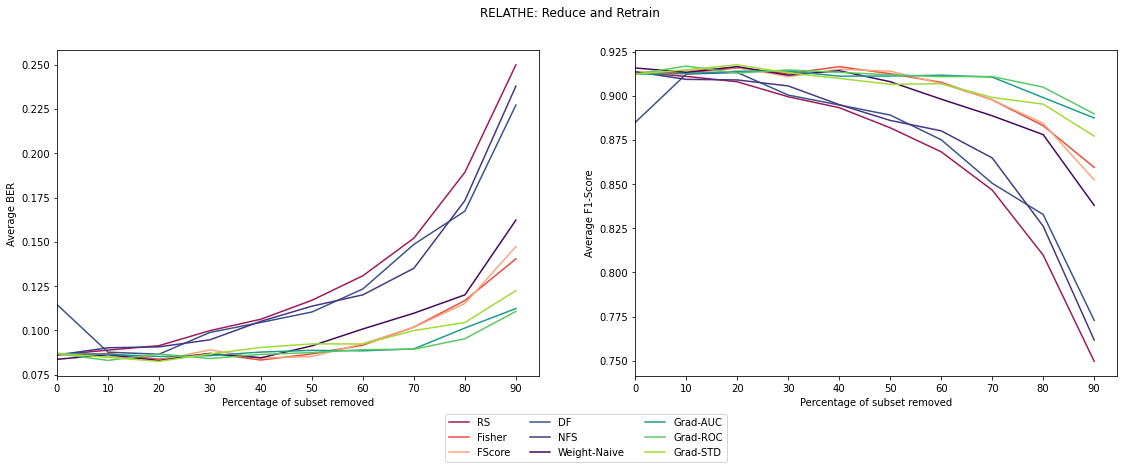

In [37]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
for i in ber_dictionary_average_plt.keys():
#     plt.plot( np.flip(ber_dictionary_average_plt[i]),color=palette[colour[i]] )
    plt.plot( np.flip(ber_dictionary_average_plt[i]),color=colour[i] )    
# plt.legend(ber_dictionary_average_plt.keys(), ncol=3, loc=2)
plt.ylabel("Average BER")
plt.xlabel("Percentage of subset removed")
plt.xlim(0)
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# dictionary_average_sns

plt.subplot(1,2,2)
for i in cr_dictionary_average_plt.keys():
    plt.plot( np.flip(cr_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(cr_dictionary_average_plt.keys(), ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.legend([j for i, j in name_set], ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.ylabel("Average F1-Score")
plt.xlabel("Percentage of subset removed")
plt.xlim(0)
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
plt.suptitle(f"{dataset}: Reduce and Retrain")

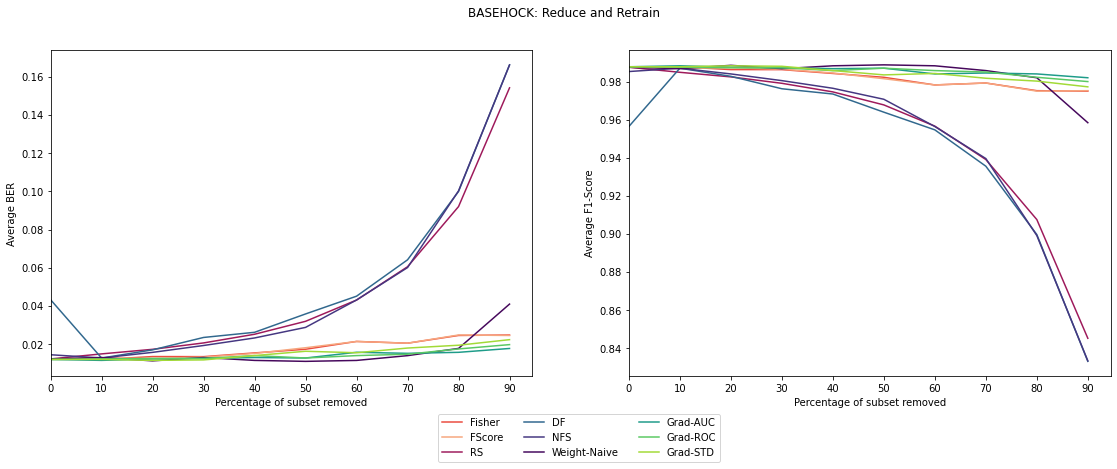

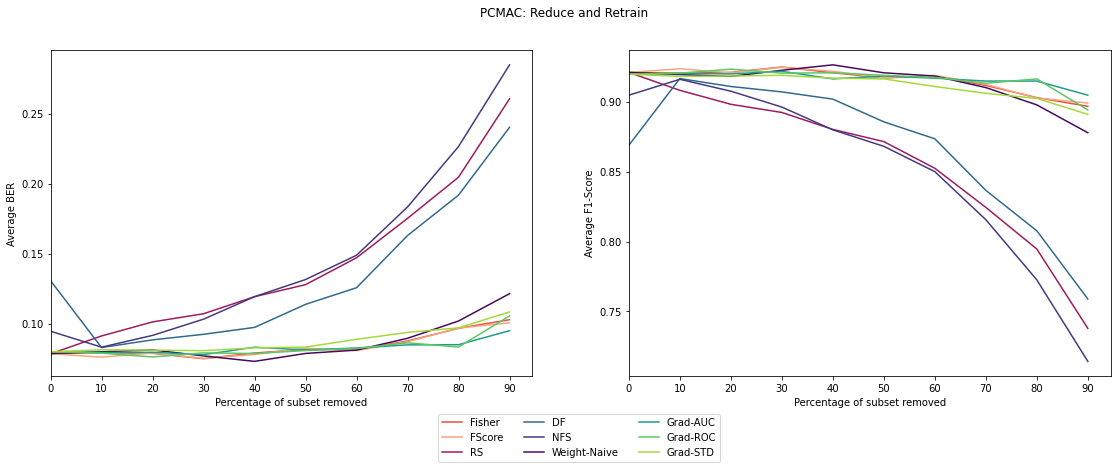

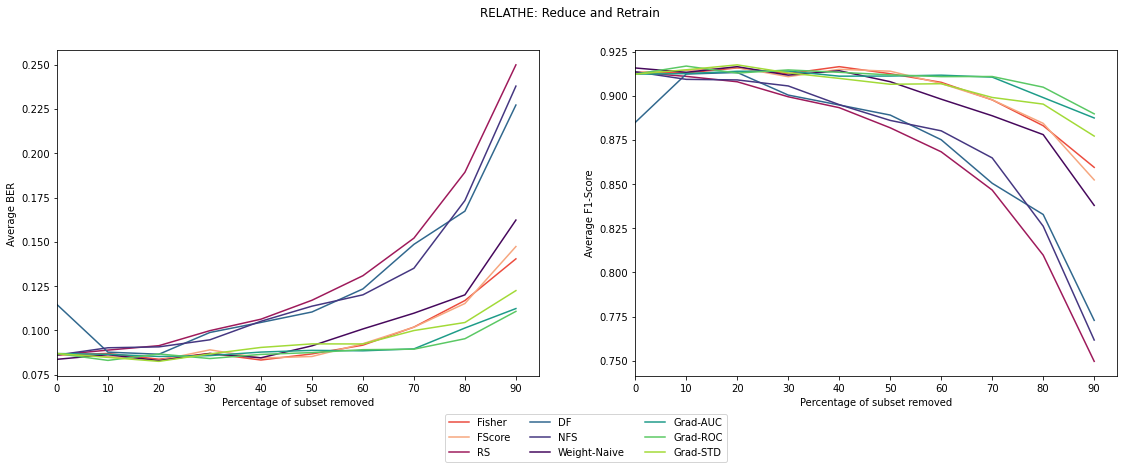

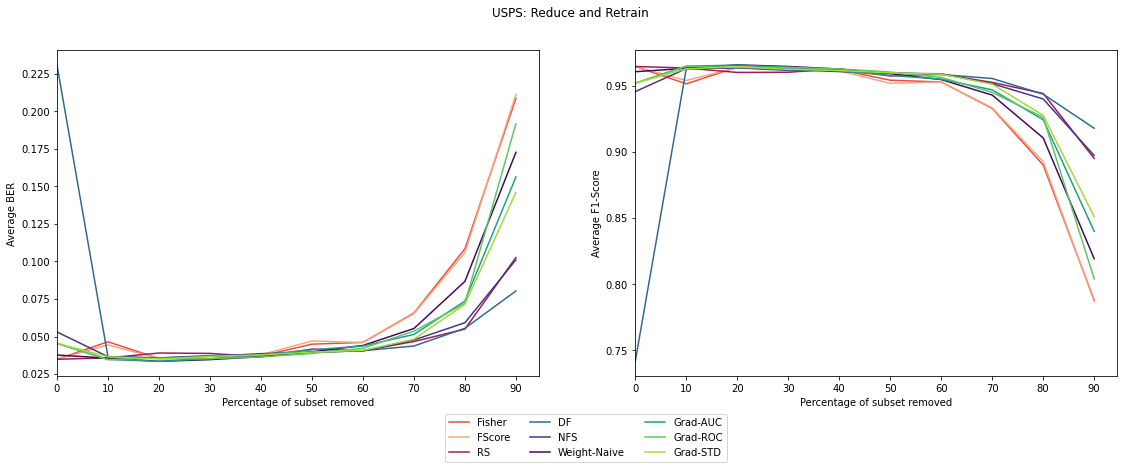

Text(0, 0.5, 'BER')

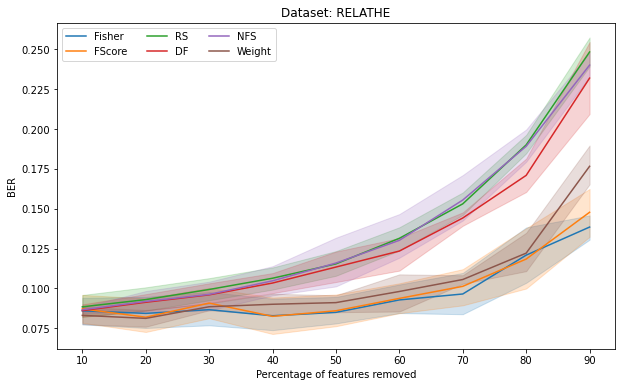

In [39]:
import pandas as pd

plots=[]
for key, value in dictionary_average_sns.items():
    run=0
    data=[]
    for r in value:
        percentage=len(for_range)*10
        for p in r:
            data.append([run, percentage, p, key])
            percentage -= 10
        run += 1
    plots.append(pd.DataFrame(data, columns=['run', 'percentage', 'value', "method"]) )
# plot=pd.DataFrame(data, columns=['run', 'percentage', 'value'])
# plot

# plots= pd.concat(plots)
# plots

# legend_dict= {"Simul":"IE-Weight", "ThresholdedSimul":"IE-Weight-Thresholded", 
#               "RS":"RandomSelection", "DF":"DeepFeature", 
#               "Fisher":"FisherScore", "FScore":"FScore", 
#               "Grad-sum":"IE-Grad-sum", "Grad-std":"IE-Grad-std"}

# legend=[]
# for i in dictionary_average_plt.keys():
#     legend.append(legend_dict[i])

import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,6))

for i, c in zip(plots, [palette[colour[i]] for i in [z[1] for z in model_list]]):
    sns.lineplot(data=i, x='percentage', y='value', color=c)
# sns.lineplot(data=plots, x='percentage', y='value')
# sns.lineplot(data=plot1, x='percentage', y='value', sort=False )
# _=plt.xticks([i for i in range(10,80,10)],[i for i in range(70,0,-10)])
# plt.legend(dictionary_average_plt.keys(), ncol=4)
plt.legend(dictionary_average_plt.keys(), ncol=3, loc=2)
# plt.legend(legend)
plt.title("Dataset: "+dataset)
plt.xlabel("Percentage of features removed")
plt.ylabel("BER")


## Ranking of Feature

In [10]:
print(dataset)
for i in ber_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(ber_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
#     print(i, np.flip(dictionary_average_plt[i]) ) 
    print(); print()

BASEHOCK
Fisher
0.0123 & 0.012 & 0.0135 & 0.0135 & 0.0155 & 0.0174 & 0.0215 & 0.0205 & 0.0246 & 0.0248 & 

FScore
0.0123 & 0.0128 & 0.0125 & 0.0132 & 0.0152 & 0.0182 & 0.0214 & 0.0205 & 0.0248 & 0.0246 & 

RS
0.0123 & 0.0149 & 0.0173 & 0.0207 & 0.0252 & 0.032 & 0.0431 & 0.0606 & 0.0921 & 0.1542 & 

DF
0.0433 & 0.0128 & 0.017 & 0.0235 & 0.0262 & 0.0359 & 0.0452 & 0.0642 & 0.1 & 0.1663 & 

NFS
0.0145 & 0.0128 & 0.0157 & 0.0193 & 0.0233 & 0.0288 & 0.0432 & 0.0601 & 0.1003 & 0.1662 & 

Weight
0.0123 & 0.013 & 0.0113 & 0.013 & 0.0115 & 0.011 & 0.0115 & 0.014 & 0.0178 & 0.041 & 

Grad-AUC
0.012 & 0.0116 & 0.0123 & 0.0126 & 0.013 & 0.0128 & 0.0158 & 0.0152 & 0.0158 & 0.0178 & 

Grad-ROC
0.012 & 0.0123 & 0.0125 & 0.0125 & 0.014 & 0.0128 & 0.014 & 0.0148 & 0.0175 & 0.0198 & 

Grad-STD
0.012 & 0.0121 & 0.0116 & 0.0118 & 0.0141 & 0.0163 & 0.0155 & 0.018 & 0.0195 & 0.0224 & 

Grad-COV
0.012 & 0.013 & 0.0118 & 0.0128 & 0.012 & 0.0125 & 0.0138 & 0.015 & 0.0158 & 0.0178 & 



In [11]:
print(dataset)
for i in cr_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(cr_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
#     print(i, np.flip(dictionary_average_plt[i]) ) 
    print(); print()

BASEHOCK
Fisher
0.9877 & 0.9879 & 0.9864 & 0.9864 & 0.9844 & 0.9824 & 0.9784 & 0.9794 & 0.9754 & 0.9751 & 

FScore
0.9877 & 0.9872 & 0.9874 & 0.9867 & 0.9847 & 0.9817 & 0.9784 & 0.9794 & 0.9751 & 0.9754 & 

RS
0.9877 & 0.985 & 0.9826 & 0.9792 & 0.9747 & 0.9679 & 0.9567 & 0.9392 & 0.9076 & 0.8452 & 

DF
0.9565 & 0.9872 & 0.9829 & 0.9764 & 0.9736 & 0.9641 & 0.9548 & 0.9357 & 0.8997 & 0.8331 & 

NFS
0.9854 & 0.9872 & 0.9842 & 0.9807 & 0.9766 & 0.9708 & 0.9565 & 0.9397 & 0.8992 & 0.8334 & 

Weight
0.9877 & 0.9869 & 0.9887 & 0.9869 & 0.9884 & 0.9889 & 0.9884 & 0.9859 & 0.9822 & 0.9585 & 

Grad-AUC
0.9879 & 0.9884 & 0.9877 & 0.9874 & 0.9869 & 0.9872 & 0.9842 & 0.9847 & 0.9842 & 0.9822 & 

Grad-ROC
0.9879 & 0.9877 & 0.9874 & 0.9874 & 0.9859 & 0.9872 & 0.9859 & 0.9852 & 0.9824 & 0.9802 & 

Grad-STD
0.9879 & 0.9879 & 0.9884 & 0.9882 & 0.9859 & 0.9837 & 0.9844 & 0.9819 & 0.9804 & 0.9774 & 

Grad-COV
0.9879 & 0.9869 & 0.9882 & 0.9872 & 0.9879 & 0.9874 & 0.9862 & 0.9849 & 0.9842 & 0.9822 & 



In [13]:
print(dataset)
for i in ber_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(ber_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
#     print(i, np.flip(dictionary_average_plt[i]) ) 
    print(); print()

PCMAC
Fisher
0.0788 & 0.0796 & 0.0791 & 0.0752 & 0.0793 & 0.0819 & 0.0816 & 0.0879 & 0.0969 & 0.1031 & 

FScore
0.0788 & 0.0764 & 0.0793 & 0.0755 & 0.0783 & 0.0828 & 0.081 & 0.0873 & 0.0971 & 0.1008 & 

RS
0.0788 & 0.0915 & 0.1015 & 0.1073 & 0.1195 & 0.1281 & 0.1472 & 0.1753 & 0.2047 & 0.2606 & 

DF
0.1309 & 0.0832 & 0.0887 & 0.0927 & 0.0976 & 0.114 & 0.1259 & 0.1631 & 0.1919 & 0.2403 & 

NFS
0.0949 & 0.0835 & 0.0919 & 0.1035 & 0.1195 & 0.1317 & 0.1491 & 0.1835 & 0.2266 & 0.2848 & 

Weight
0.0789 & 0.0802 & 0.0815 & 0.0772 & 0.0734 & 0.079 & 0.0814 & 0.0898 & 0.1021 & 0.1216 & 

Grad-AUC
0.0802 & 0.0796 & 0.0798 & 0.0781 & 0.0835 & 0.0815 & 0.0829 & 0.0851 & 0.0852 & 0.0952 & 

Grad-ROC
0.0802 & 0.0792 & 0.0765 & 0.0794 & 0.079 & 0.0811 & 0.0826 & 0.0866 & 0.0836 & 0.1057 & 

Grad-STD
0.0802 & 0.0816 & 0.0814 & 0.081 & 0.083 & 0.0835 & 0.0891 & 0.094 & 0.0973 & 0.1086 & 

Grad-COV
0.0802 & 0.0815 & 0.0819 & 0.0827 & 0.0792 & 0.0837 & 0.0865 & 0.0847 & 0.0859 & 0.096 & 



In [14]:
print(dataset)
for i in cr_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(cr_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
#     print(i, np.flip(dictionary_average_plt[i]) ) 
    print(); print()

PCMAC
Fisher
0.9209 & 0.9204 & 0.9209 & 0.9247 & 0.9206 & 0.9169 & 0.9183 & 0.9115 & 0.9028 & 0.8966 & 

FScore
0.9209 & 0.9235 & 0.9206 & 0.9245 & 0.9216 & 0.917 & 0.9188 & 0.9123 & 0.9026 & 0.899 & 

RS
0.9209 & 0.9081 & 0.8981 & 0.8922 & 0.8801 & 0.8714 & 0.8523 & 0.8244 & 0.7946 & 0.7379 & 

DF
0.8688 & 0.9165 & 0.9108 & 0.9069 & 0.9018 & 0.8855 & 0.8734 & 0.8366 & 0.8077 & 0.7589 & 

NFS
0.9046 & 0.9159 & 0.9074 & 0.8961 & 0.8798 & 0.868 & 0.8499 & 0.8156 & 0.7726 & 0.7143 & 

Weight
0.9209 & 0.9193 & 0.918 & 0.9224 & 0.9263 & 0.9206 & 0.9183 & 0.91 & 0.8977 & 0.8778 & 

Grad-AUC
0.9196 & 0.9201 & 0.9198 & 0.9216 & 0.9162 & 0.9183 & 0.9167 & 0.9147 & 0.9147 & 0.9046 & 

Grad-ROC
0.9196 & 0.9204 & 0.9232 & 0.9204 & 0.9206 & 0.9188 & 0.9173 & 0.9131 & 0.9162 & 0.8941 & 

Grad-STD
0.9196 & 0.918 & 0.9183 & 0.9188 & 0.9167 & 0.9162 & 0.9108 & 0.9059 & 0.9023 & 0.8909 & 

Grad-COV
0.9196 & 0.9183 & 0.9178 & 0.917 & 0.9206 & 0.916 & 0.9129 & 0.9149 & 0.9139 & 0.9038 & 



In [16]:
print(dataset)
for i in ber_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(ber_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
#     print(i, np.flip(dictionary_average_plt[i]) ) 
    print(); print()

RELATHE
Fisher
0.0862 & 0.087 & 0.0838 & 0.0871 & 0.0833 & 0.0868 & 0.0917 & 0.1019 & 0.1169 & 0.1404 & 

FScore
0.0862 & 0.0854 & 0.0831 & 0.0891 & 0.0845 & 0.0853 & 0.0925 & 0.1018 & 0.1152 & 0.1474 & 

RS
0.0862 & 0.0889 & 0.0914 & 0.0999 & 0.1064 & 0.117 & 0.1309 & 0.1521 & 0.1893 & 0.2499 & 

DF
0.1146 & 0.0878 & 0.0866 & 0.0989 & 0.1045 & 0.1104 & 0.1235 & 0.1486 & 0.1673 & 0.2272 & 

NFS
0.0861 & 0.0902 & 0.0908 & 0.0947 & 0.1052 & 0.1137 & 0.1201 & 0.1351 & 0.1733 & 0.2379 & 

Weight
0.0837 & 0.0863 & 0.083 & 0.087 & 0.0846 & 0.0913 & 0.1009 & 0.1098 & 0.1201 & 0.1623 & 

Grad-AUC
0.087 & 0.0866 & 0.0853 & 0.0858 & 0.0878 & 0.0888 & 0.0885 & 0.0896 & 0.1014 & 0.1124 & 

Grad-ROC
0.087 & 0.0831 & 0.0867 & 0.0842 & 0.0865 & 0.0875 & 0.0892 & 0.0894 & 0.0954 & 0.1108 & 

Grad-STD
0.087 & 0.0848 & 0.0826 & 0.0868 & 0.0904 & 0.0924 & 0.0924 & 0.1 & 0.1045 & 0.1225 & 

Grad-COV
0.087 & 0.0819 & 0.0839 & 0.0803 & 0.0826 & 0.0849 & 0.0877 & 0.0864 & 0.0961 & 0.1193 & 



In [17]:
print(dataset)
for i in cr_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(cr_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
#     print(i, np.flip(dictionary_average_plt[i]) ) 
    print(); print()

RELATHE
Fisher
0.9134 & 0.913 & 0.9159 & 0.9126 & 0.9166 & 0.9126 & 0.9077 & 0.8978 & 0.8831 & 0.8595 & 

FScore
0.9134 & 0.9144 & 0.9161 & 0.9109 & 0.9151 & 0.914 & 0.907 & 0.8978 & 0.8845 & 0.8524 & 

RS
0.9134 & 0.9111 & 0.908 & 0.8995 & 0.8933 & 0.8819 & 0.8683 & 0.8467 & 0.8098 & 0.7496 & 

DF
0.885 & 0.9124 & 0.9133 & 0.9005 & 0.8949 & 0.8892 & 0.8752 & 0.8505 & 0.8328 & 0.7728 & 

NFS
0.9137 & 0.9094 & 0.9091 & 0.9057 & 0.8951 & 0.8861 & 0.8802 & 0.8649 & 0.8262 & 0.7617 & 

Weight
0.9158 & 0.9134 & 0.9166 & 0.9118 & 0.9143 & 0.9081 & 0.8982 & 0.8888 & 0.8781 & 0.838 & 

Grad-AUC
0.9123 & 0.9127 & 0.914 & 0.9141 & 0.9112 & 0.9113 & 0.9118 & 0.9107 & 0.8991 & 0.8875 & 

Grad-ROC
0.9123 & 0.9169 & 0.913 & 0.9147 & 0.9134 & 0.9119 & 0.9109 & 0.911 & 0.905 & 0.8898 & 

Grad-STD
0.9123 & 0.9148 & 0.9176 & 0.9131 & 0.9099 & 0.9066 & 0.9069 & 0.8991 & 0.8954 & 0.8772 & 

Grad-COV
0.9123 & 0.9175 & 0.9155 & 0.9193 & 0.9173 & 0.9143 & 0.9115 & 0.9134 & 0.9042 & 0.8808 & 



In [19]:
print(dataset)
for i in ber_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(ber_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
#     print(i, np.flip(dictionary_average_plt[i]) ) 
    print(); print()

USPS
Fisher
0.0348 & 0.0465 & 0.0353 & 0.035 & 0.037 & 0.0449 & 0.0461 & 0.0657 & 0.1085 & 0.2087 & 

FScore
0.0348 & 0.0444 & 0.0354 & 0.0368 & 0.0378 & 0.047 & 0.046 & 0.0652 & 0.106 & 0.2113 & 

RS
0.0348 & 0.0357 & 0.039 & 0.0387 & 0.0365 & 0.0416 & 0.0405 & 0.0466 & 0.0549 & 0.1027 & 

DF
0.2311 & 0.0366 & 0.0356 & 0.0373 & 0.0376 & 0.0394 & 0.0405 & 0.0437 & 0.0555 & 0.0803 & 

NFS
0.053 & 0.0366 & 0.0358 & 0.0368 & 0.0386 & 0.0396 & 0.0404 & 0.0477 & 0.0592 & 0.1011 & 

Weight
0.0377 & 0.0356 & 0.0334 & 0.0346 & 0.0365 & 0.0398 & 0.044 & 0.0553 & 0.0867 & 0.1728 & 

Grad-AUC
0.0454 & 0.0347 & 0.0335 & 0.0352 & 0.0378 & 0.0411 & 0.0437 & 0.0514 & 0.0736 & 0.1563 & 

Grad-ROC
0.0454 & 0.0347 & 0.0355 & 0.0352 & 0.0364 & 0.0387 & 0.0422 & 0.0536 & 0.0721 & 0.1918 & 

Grad-STD
0.0454 & 0.0365 & 0.035 & 0.0368 & 0.0378 & 0.0396 & 0.0407 & 0.0482 & 0.0715 & 0.1461 & 

Grad-COV
0.0454 & 0.0346 & 0.0342 & 0.0339 & 0.0359 & 0.0389 & 0.0443 & 0.0507 & 0.0713 & 0.197 & 



In [20]:
print(dataset)
for i in cr_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(cr_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
#     print(i, np.flip(dictionary_average_plt[i]) ) 
    print(); print()

USPS
Fisher
0.9649 & 0.9517 & 0.9643 & 0.9643 & 0.9624 & 0.9545 & 0.9531 & 0.9331 & 0.8902 & 0.7878 & 

FScore
0.9649 & 0.9542 & 0.9641 & 0.9627 & 0.9615 & 0.9521 & 0.9531 & 0.9335 & 0.8928 & 0.7869 & 

RS
0.9649 & 0.9637 & 0.9603 & 0.9605 & 0.963 & 0.9576 & 0.959 & 0.9528 & 0.9444 & 0.8951 & 

DF
0.7415 & 0.963 & 0.9639 & 0.9619 & 0.9618 & 0.9601 & 0.9588 & 0.9558 & 0.9439 & 0.9181 & 

NFS
0.9458 & 0.9633 & 0.9638 & 0.9628 & 0.961 & 0.9598 & 0.9593 & 0.9518 & 0.9402 & 0.8974 & 

Weight
0.9609 & 0.9635 & 0.9661 & 0.9649 & 0.9629 & 0.9594 & 0.955 & 0.9432 & 0.9107 & 0.8192 & 

Grad-AUC
0.9522 & 0.9651 & 0.9659 & 0.9643 & 0.9614 & 0.9581 & 0.9553 & 0.9472 & 0.9245 & 0.84 & 

Grad-ROC
0.9522 & 0.9651 & 0.964 & 0.9642 & 0.963 & 0.9607 & 0.9566 & 0.9452 & 0.9264 & 0.804 & 

Grad-STD
0.9522 & 0.9631 & 0.9646 & 0.9627 & 0.9618 & 0.9599 & 0.959 & 0.9515 & 0.9278 & 0.8511 & 

Grad-COV
0.9522 & 0.965 & 0.9653 & 0.9655 & 0.9637 & 0.9606 & 0.9545 & 0.9479 & 0.9268 & 0.7974 & 



In [168]:
# import pickle
# idx= pickle.load(open("./experiments/Benchmark/exp_log0/Fisher/fisher_score_idx-USPS.pkl","rb"))
# idx

array([212, 195, 229, 196, 179, 203, 219, 228, 213, 167, 188, 211, 204,
       120, 151, 119, 218, 163, 168, 135, 104, 180, 152, 178, 136, 234,
       162, 172, 183, 147,  75, 115, 103, 131, 194,  84, 146, 184, 130,
       100,  99,  59, 173, 187, 220, 164, 230, 189, 245, 114, 227,  27,
       157,  43, 197, 233,  68,  91, 166, 246, 121,  26, 210, 116, 235,
        21,  37, 156, 153, 141,  83,  42, 205, 181,  85, 105,  88,  90,
        74, 125, 137, 169,  58, 106,  28, 122, 148,  69, 244, 247,  76,
        23,  92, 165,  55,  22,  98,  11, 248, 109, 101,  52, 132,  53,
        87, 150, 202,  71,  36, 182, 126,  12,  39, 177, 138, 129, 145,
        20, 161,  10,  44, 193, 142, 232, 231,  60, 249, 107, 108, 140,
       158,  24, 113,  40, 199, 226, 221,   7, 250, 171,  56, 209, 110,
        25,  67,  93,  72,   5, 174,   9,  29, 236,  38, 124,   6, 118,
       243, 134, 117, 154,   8, 149,  13,   4,  82, 200, 190,  89, 123,
       102, 192,  19, 155, 208, 214, 127,  70,  45, 225,  97, 13

In [169]:
# def select_features(idx, shape, percentile):
    
#     weights= np.zeros(shape)
    
#     selection= math.floor(len(weights)*0.01*int(percentile) )
#     weights[ idx[:-selection] ]=1
    
#     return weights

# select_features(idx, len(idx), 10)

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Ranking of Features

In [2]:
import pickle
import numpy as np
grads= pickle.load(open("./experiments/scikit_feature/exp_log4/Grad/list/scikit_feat-Grad-list-RELATHE-100.pkl", "rb"))
grad_all= np.array(grads).reshape(100,-1,4322)
grad_all.shape

(100, 4, 4322)

In [3]:
epoch_mean=[]
epoch_std=[]
epoch_sum=[]

for epoch in grad_all:
    epoch_mean.append( epoch.mean(axis=0) )
    epoch_std.append( epoch.std(axis=0) )
    epoch_sum.append( epoch.sum(axis=0) )
    
epoch_mean= np.array(epoch_mean)
epoch_std= np.array(epoch_std)
epoch_sum= np.array(epoch_sum)

In [6]:
channels= np.arange(4322)

4321

Text(0.5, 1.0, 'Abs. sum of gradients for each epoch')

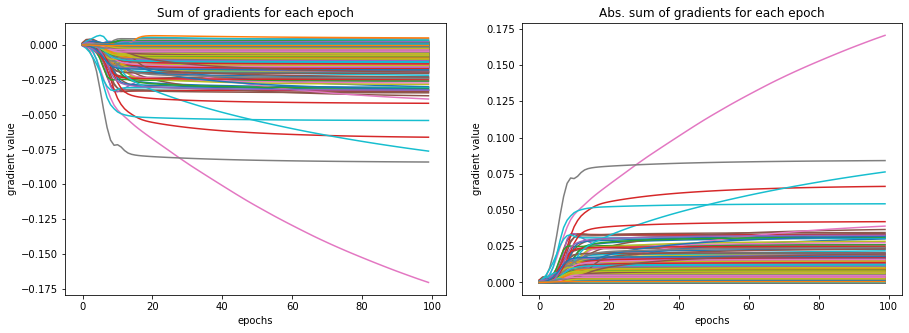

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(121)
_=plt.plot(epoch_sum)
# plt.legend(channels, loc=4, bbox_to_anchor=(1.5, 0.))
plt.xlabel("epochs"); plt.ylabel("gradient value")
plt.title("Sum of gradients for each epoch")

plt.subplot(122)
_=plt.plot(abs(epoch_sum))
# plt.legend(channels, loc=4, bbox_to_anchor=(1.4, 0.))
plt.xlabel("epochs"); plt.ylabel("gradient value")
plt.title("Abs. sum of gradients for each epoch")

In [9]:
dictionary={}
for idx, name in zip(range(len(channels)), channels):
    dictionary[name]= np.trapz(abs(epoch_sum[:, idx]))

def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)[:10]

[(286, 10.692314),
 (287, 7.6758976),
 (1263, 5.619527),
 (2149, 4.9699664),
 (3739, 4.899392),
 (4223, 3.673477),
 (745, 3.1168528),
 (503, 3.0563576),
 (257, 3.0202992),
 (2059, 2.9230287)]

## Rate of Change

In [10]:
dictionary={}
for i in range(len(channels)):
    rolled= np.roll( epoch_sum[:, i], 1 )
    rolled[0]=0.
    diff= epoch_sum[:, i]-rolled
    dictionary[channels[i]]= np.trapz(abs(diff))
#     plt.plot(diff)
# plt.legend(channels, loc=4, bbox_to_anchor=(1.4, 0.))
# plt.xlabel("epochs"); plt.ylabel("x_1-x_0")
# plt.title("Rate of change for each epoch")

In [11]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)[:10]

[(286, 0.1700074),
 (3739, 0.08944227),
 (287, 0.084605366),
 (1263, 0.07131306),
 (2149, 0.05476363),
 (674, 0.050882664),
 (745, 0.043076962),
 (4223, 0.041869517),
 (2826, 0.04013327),
 (1565, 0.03677483)]

## Covariance

In [12]:
def process_link(array, threshold, channels, function, transpose=True):
    
    link={}
    for i in channels:
        link[i]=[]
        
    if transpose:
        array= array.T

    i=0; j=0; skip_condition=0
    print("Threshold: ", threshold)
    print()
    for row in np.where( abs(function(array)) > threshold, function(array), 0):
        
        for column in row:
            if i==j:
                j+=1
                continue
            
            if abs(column) > threshold and column != 1.:
#                 print(f"value: {round(column,3)}, {channels[i]} {channels[j]}")
    #             dictionary[f"{channels[i]}-{channels[j]}"]= round(column,3)
                link[channels[i]].append(channels[j])
#                 print(f"{channels[i]} {channels[j]} {column} {j}")
            j+=1
                
                
#             print("j", j, "i", i, column)
#             if j==skip_condition:
#                 skip_condition += 1
#                 j+= 1
#                 continue # pass

#             if abs(column) > threshold and column != 1.:
#                 print(f"coef: {round(column,3)}, {channels[i]} {channels[j]}")
#     #             dictionary[f"{channels[i]}-{channels[j]}"]= round(column,3)
#                 link[channels[i]].append(channels[j])
#     #             print(f"{channels[i]} {channels[j]} {column}")
#             j+=1
        i+=1
        j=0
        
    return link
link= process_link(epoch_sum, abs(np.cov(epoch_sum.T)).mean(), channels, np.cov)
# print()
# for k, v in link.items():
#     print(k,v)
#     print(k, len(v))
#     print()

Threshold:  2.1433339897063568e-07



In [13]:
# Sanity check
def link_sort(x):
    return len(x[1])
[ (i[0], len(i[1])) for i in sorted(link.items(), key=link_sort, reverse=True) ][:10]

[(286, 4056),
 (287, 3940),
 (1263, 3918),
 (3739, 3913),
 (2149, 3809),
 (4223, 3748),
 (745, 3700),
 (1565, 3661),
 (475, 3628),
 (4294, 3626)]

Text(0, 0.5, 'Value')

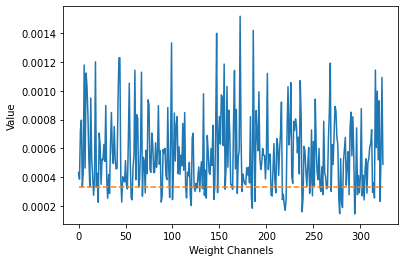

In [49]:
def process_cov(array, threshold, channels, dictionary={}, transpose=True):

    for i in channels:
        dictionary[i]=0
    
    i=0; j=0; 
    print("Threshold: ", threshold)
    print()
    
    if transpose:
        array= array.T
    
    for row in np.where( abs(np.cov(array)) > threshold, np.cov(array), 0):
        for column in row:
#             print("j", j, "i", i)
#             print("skip_condition", skip_condition)
#             print()
            if j==i:
                break

            if abs(column) > threshold and column != 1:
                print(f"cov: {round(column,3)}, {channels[i]} {channels[j]}")
                dictionary[channels[i]] += abs(column)
                dictionary[channels[j]] += abs(column)
            j+=1
        i+=1
        j=0
        
    return dictionary

dictionary= process_cov(epoch_sum, abs(np.cov(epoch_sum.T )).mean(), channels)

In [15]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)[:10]

[(286, 0.1700074),
 (3739, 0.08944227),
 (287, 0.084605366),
 (1263, 0.07131306),
 (2149, 0.05476363),
 (674, 0.050882664),
 (745, 0.043076962),
 (4223, 0.041869517),
 (2826, 0.04013327),
 (1565, 0.03677483)]

## Standard Deviation

In [18]:
# higher the better, by definition, std will be greater if value achieved is greater
std_dict={}
# plt.figure(figsize=(17,8))
for i, j in zip(range(len(channels)), channels):
#     plt.subplot(2,5,i+1)
    std= ( epoch_std[:,i] ) 
#     _= plt.plot( std )
    value= round( np.trapz(epoch_std[:, i]), 3 )# AuC
    std_dict[j]=value 
#     value= round((std.std() ), 3) 
#     plt.title(f"{j}: {str(value)}")

In [19]:
def dictionary_sort(x):
    return x[1]
sorted(std_dict.items(), key=dictionary_sort, reverse=True)[:10]

[(674, 0.009),
 (1263, 0.009),
 (3739, 0.007),
 (745, 0.006),
 (2092, 0.005),
 (2826, 0.005),
 (287, 0.004),
 (503, 0.004),
 (1565, 0.004),
 (1840, 0.004)]

## Performance Retention

In [1]:
import pickle
import numpy as np

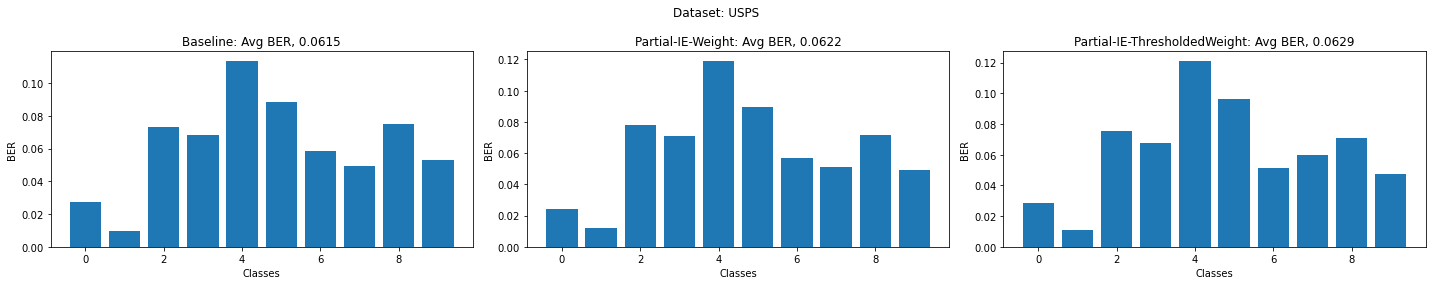

In [89]:
# Performance Retention
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(1,3)
i=0; j=0
dataset= "USPS"
folder_dict={"Baseline":"Baseline", 
             "Phases-Weight":"Phases",
             "Phases-ThresholdedWeight":"Phases"} #model: folder

dict_name= {"Baseline":"Baseline", "Phases-Weight":"Partial-IE-Weight", "Phases-ThresholdedWeight":"Partial-IE-ThresholdedWeight"}

plt.suptitle("Dataset: "+dataset )
# fig.set_figheight(15)
fig.set_figwidth(20)

for model in folder_dict.keys():
    avg= []
    for folder in range(5):
        ber= pickle.load( open("./experiments/Benchmark/exp_log"+str(folder)+"/"+folder_dict[model]+"/benchmark-"+model+"-"+dataset+"-ber.pkl", "rb") )
#         print(ber)
        avg.append(ber)
    
    axes[j].bar([i for i in range(len(ber))], np.array(avg).mean(axis=0))
    axes[j].set_title(dict_name[model]+": Avg BER, "+str(round(np.array(avg).mean(),4)))
    axes[j].set_xlabel("Classes")
    axes[j].set_ylabel("BER")
    j += 1
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

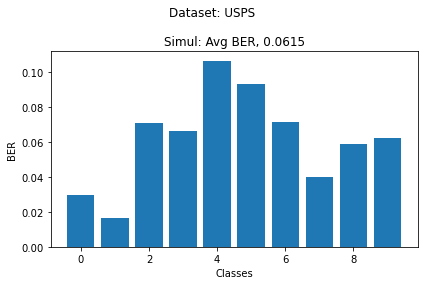

In [549]:
# Performance Retention
import matplotlib.pyplot as plt
import pickle
import numpy as np

# fig, axes= plt.subplots(1,3)
fig= plt.figure()
i=0; j=0
dataset= "USPS"
folder_dict={"Weight":"Weight"} #model: folder


plt.suptitle("Dataset: "+dataset )
# fig.set_figheight(15)
# fig.set_figwidth(20)

for model in folder_dict.keys():
    avg= []
    for folder in range(5):
        ber= pickle.load( open("./experiments/Benchmark/exp_log"+str(folder)+"/"+folder_dict[model]+"/benchmark-"+model+"-"+dataset+"-ber.pkl", "rb") )
#         print(ber)
        avg.append(ber)
    
    plt.bar([i for i in range(len(ber))], np.array(avg).mean(axis=0))
    plt.title(model+": Avg BER, "+str(round(np.array(avg).mean(),4)))
    plt.xlabel("Classes")
    plt.ylabel("BER")
    j += 1
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Captum xAI

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

In [ ]:
from utilities.ScikitFeatDataset import ScikitFeatDataset

data=ScikitFeatDataset(dataset=args.data, split=config["split"], default_path=default_path)
classes=data.classes

In [ ]:
from Models.ScikitFeatBaseline_Model import ScikitFeatBaseline_Model

model= ScikitFeatBaseline_Model(device=device, input_dim=data.X.shape[1], classes=classes, dataset=data.dataset).to(device)

exp=
dataset=

model.load_state(f"./experiment/simul_study/exp_log{exp}/Baseline/state_dict/simul_study-Baseline-{dataset}-state_dict-100.pt")

model.load_state(f"./experiment/simul_study/exp_log{exp}/DF/state_dict/simul_study-DF-{dataset}-state_dict-100.pt")

model.load_state(f"./experiment/simul_study/exp_log{exp}/NFS/state_dict/simul_study-NFS-{dataset}-state_dict-100.pt")

model.load_state(f"./experiment/simul_study/exp_log{exp}/Weight/state_dict/simul_study-Weight-{dataset}-state_dict-100.pt")